<img src= "clashbanner.png" style="max-width:80%"/>

# Clash of Clans: An Exploratory Data Analysis

-----------------------------------------------

### What is Clash of Clans?

Clash of Clans is a highly popular real-time strategy mobile game first released on 2nd August 2012 by Supercell. The player is the chief of their own village, upgrading their main Town Hall and it's resources and defenses. This is accomplished through gaining gold and elixir currency by attacking other players' villages with their trained army and troops. There have been new base additions to the game since release, such as the [Builder Hall](https://clashofclans.fandom.com/wiki/Builder_Hall), [Clan Capital](https://clashofclans.fandom.com/wiki/Capital_Hall) and [District Halls](https://clashofclans.fandom.com/wiki/District_Hall). 

Despite the large focus on base building, Clash of Clans promotes players to join clans. Clans can participate in Clan Wars together for more rewards and resources, as well as share battle replays, chat and donate and recieve troops from one another. The game promotes collaboration and community in order to stregthen bases, rise up in league ranks, and win wars. 

### What is the problem?

With the introduction of so many ways to play the game, there is a definite interest in player behaviours and decision-making processes. The focus of the game will differ depending on the individual, and even across clans, however there may be an underlying relationships in some of these factors that is brushed over that can contribute to success in the game. 
- For example, a clan who has a high Capital Hall League may not participate in wars, but should they? What are the chances of them winning vs. losing? 
- Another question could be that does the frequency of playing the game determine objective success, or does rushing through the game and not following the general protcols lead to worser players/clans? 

There are many factors that are worth investigating in order to optimise gameplay strategies as well as provide research insights into game dynamics and collective understanding of the game as a whole. 


### Objective:

I plan to conduct a Exploratory Data Analysis initally, and then gaining more insights into any factors which show interesting relationships and what these can tell us about how to approach the game and what to focus on to grow clan success. 

### Data Collection:

The data used in this project was sourced on Kaggle: [Clash of Clans Clans Dataset 2023](https://www.kaggle.com/datasets/asaniczka/clash-of-clans-clans-dataset-2023-3-5m-clans/data), containing information from 3.5 million clans worldwide in the year of 2023. 

---------------------------

### Importing and having an initial look at the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [99]:
df_raw = pd.read_csv('data\coc_clans_dataset.csv')

In [100]:
df_raw.head()

clan_tag        clan_name clan_type  \
0   #UQVQRJQ0      KOJIS' CLAN    closed   
1  #2QC9Y0CQU              uye      open   
2  #202CJRP2U  Uprising rivals      open   
3  #2Y89RRGLY     2inchersonly      open   
4   #99PU9QPY            aymil      open   

                                    clan_description  clan_location  \
0  STRATEGY IS MUST...RESPECT THE OTHERS...FORGIV...  International   
1                                                NaN      Indonesia   
2  💥official uprising rivals clan💥we bring 10% lu...      Indonesia   
3  Whom is not packing the meat, Shall be packing...  International   
4  regla1=no empezar la guerra sin mi permiso reg...  International   

   isFamilyFriendly                                     clan_badge_url  \
0              True  https://api-assets.clashofclans.com/badges/200...   
1              True  https://api-assets.clashofclans.com/badges/200...   
2              True  https://api-assets.clashofclans.com/badges/200...   
3              True  https://api-assets.clashofclans.com/badges/200...   
4              True  https://api-assets.clashofclans.com/badges/200...   

   clan_level  clan_points  clan_builder_base_points  ...  clan_war_league  \
0           6         6887                      5213  ...         Unranked   
1           1          876                      1019  ...         Unranked   
2           1          732                       670  ...         Unranked   
3           2         1156                       457  ...  Bronze League I   
4           2          674                       399  ...         Unranked   

   num_members required_builder_base_trophies  required_versus_trophies  \
0           11                           1000                      1000   
1            1                              0                         0   
2            2                              0                         0   
3            2                              0                         0   
4            2                              0                         0   

   required_townhall_level  clan_capital_hall_level  clan_capital_points  \
0                        1                        1                    0   
1                        1                        0                    0   
2                        1                        0                    0   
3                        1                        1                    0   
4                        1                        0                    0   

  capital_league  mean_member_level  mean_member_trophies  
0       Unranked                 83                  1254  
1       Unranked                 90                  1752  
2       Unranked                 30                   733  
3       Unranked                 61                  1156  
4       Unranked                 23                   674  

[5 rows x 27 columns]

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559743 entries, 0 to 3559742
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_tag                        object
 1   clan_name                       object
 2   clan_type                       object
 3   clan_description                object
 4   clan_location                   object
 5   isFamilyFriendly                bool  
 6   clan_badge_url                  object
 7   clan_level                      int64 
 8   clan_points                     int64 
 9   clan_builder_base_points        int64 
 10  clan_versus_points              int64 
 11  required_trophies               int64 
 12  war_frequency                   object
 13  war_win_streak                  int64 
 14  war_wins                        int64 
 15  war_ties                        int64 
 16  war_losses                      int64 
 17  clan_war_league                 object
 18  nu

In [5]:
# after filtering, I will now check for any NaNs in the new dataset:
if df_raw.isnull().any().any():
    print("NaNs exist")
else:
    print("No NaNs exist") 

NaNs exist


In [6]:
# I can see there is missing data from several columns (clan_name, clan_type, clan_description, clan_location)
df_raw.count()

clan_tag                          3559743
clan_name                         3559681
clan_type                         3559743
clan_description                  2208378
clan_location                     2108071
isFamilyFriendly                  3559743
clan_badge_url                    3559743
clan_level                        3559743
clan_points                       3559743
clan_builder_base_points          3559743
clan_versus_points                3559743
required_trophies                 3559743
war_frequency                     3559743
war_win_streak                    3559743
war_wins                          3559743
war_ties                          3559743
war_losses                        3559743
clan_war_league                   3559743
num_members                       3559743
required_builder_base_trophies    3559743
required_versus_trophies          3559743
required_townhall_level           3559743
clan_capital_hall_level           3559743
clan_capital_points               

### Cleaning the data:
---------------------------------

In [7]:
# I will now drop these NaN rows
df_clean = df_raw.dropna()
df_clean.count()

clan_tag                          1590981
clan_name                         1590981
clan_type                         1590981
clan_description                  1590981
clan_location                     1590981
isFamilyFriendly                  1590981
clan_badge_url                    1590981
clan_level                        1590981
clan_points                       1590981
clan_builder_base_points          1590981
clan_versus_points                1590981
required_trophies                 1590981
war_frequency                     1590981
war_win_streak                    1590981
war_wins                          1590981
war_ties                          1590981
war_losses                        1590981
clan_war_league                   1590981
num_members                       1590981
required_builder_base_trophies    1590981
required_versus_trophies          1590981
required_townhall_level           1590981
clan_capital_hall_level           1590981
clan_capital_points               

In [8]:
#data now has no NaNs
if df_clean.isnull().any().any():
    print("NaNs exist")
else:
    print("No NaNs exist") 

No NaNs exist


### Exploratory Data Analysis:
--------------------------------

In [9]:
# The main objective measure I can see is rank so I just extracted the unique values for a bit more insight
df_clean['clan_war_league'].unique()

array(['Unranked', 'Bronze League I', 'Gold League II',
       'Silver League III', 'Gold League III', 'Silver League I',
       'Master League I', 'Silver League II', 'Crystal League I',
       'Gold League I', 'Crystal League II', 'Master League II',
       'Master League III', 'Crystal League III', 'Bronze League II',
       'Champion League III', 'Champion League I', 'Bronze League III',
       'Champion League II'], dtype=object)

In [10]:
df_clean['capital_league'].unique()

array(['Unranked', 'Bronze League II', 'Gold League III', 'Gold League I',
       'Silver League III', 'Silver League I', 'Silver League II',
       'Master League II', 'Champion League II', 'Crystal League I',
       'Bronze League III', 'Crystal League III', 'Gold League II',
       'Crystal League II', 'Bronze League I', 'Legend League',
       'Master League I', 'Champion League III', 'Master League III',
       'Titan League I', 'Titan League II', 'Titan League III',
       'Champion League I'], dtype=object)

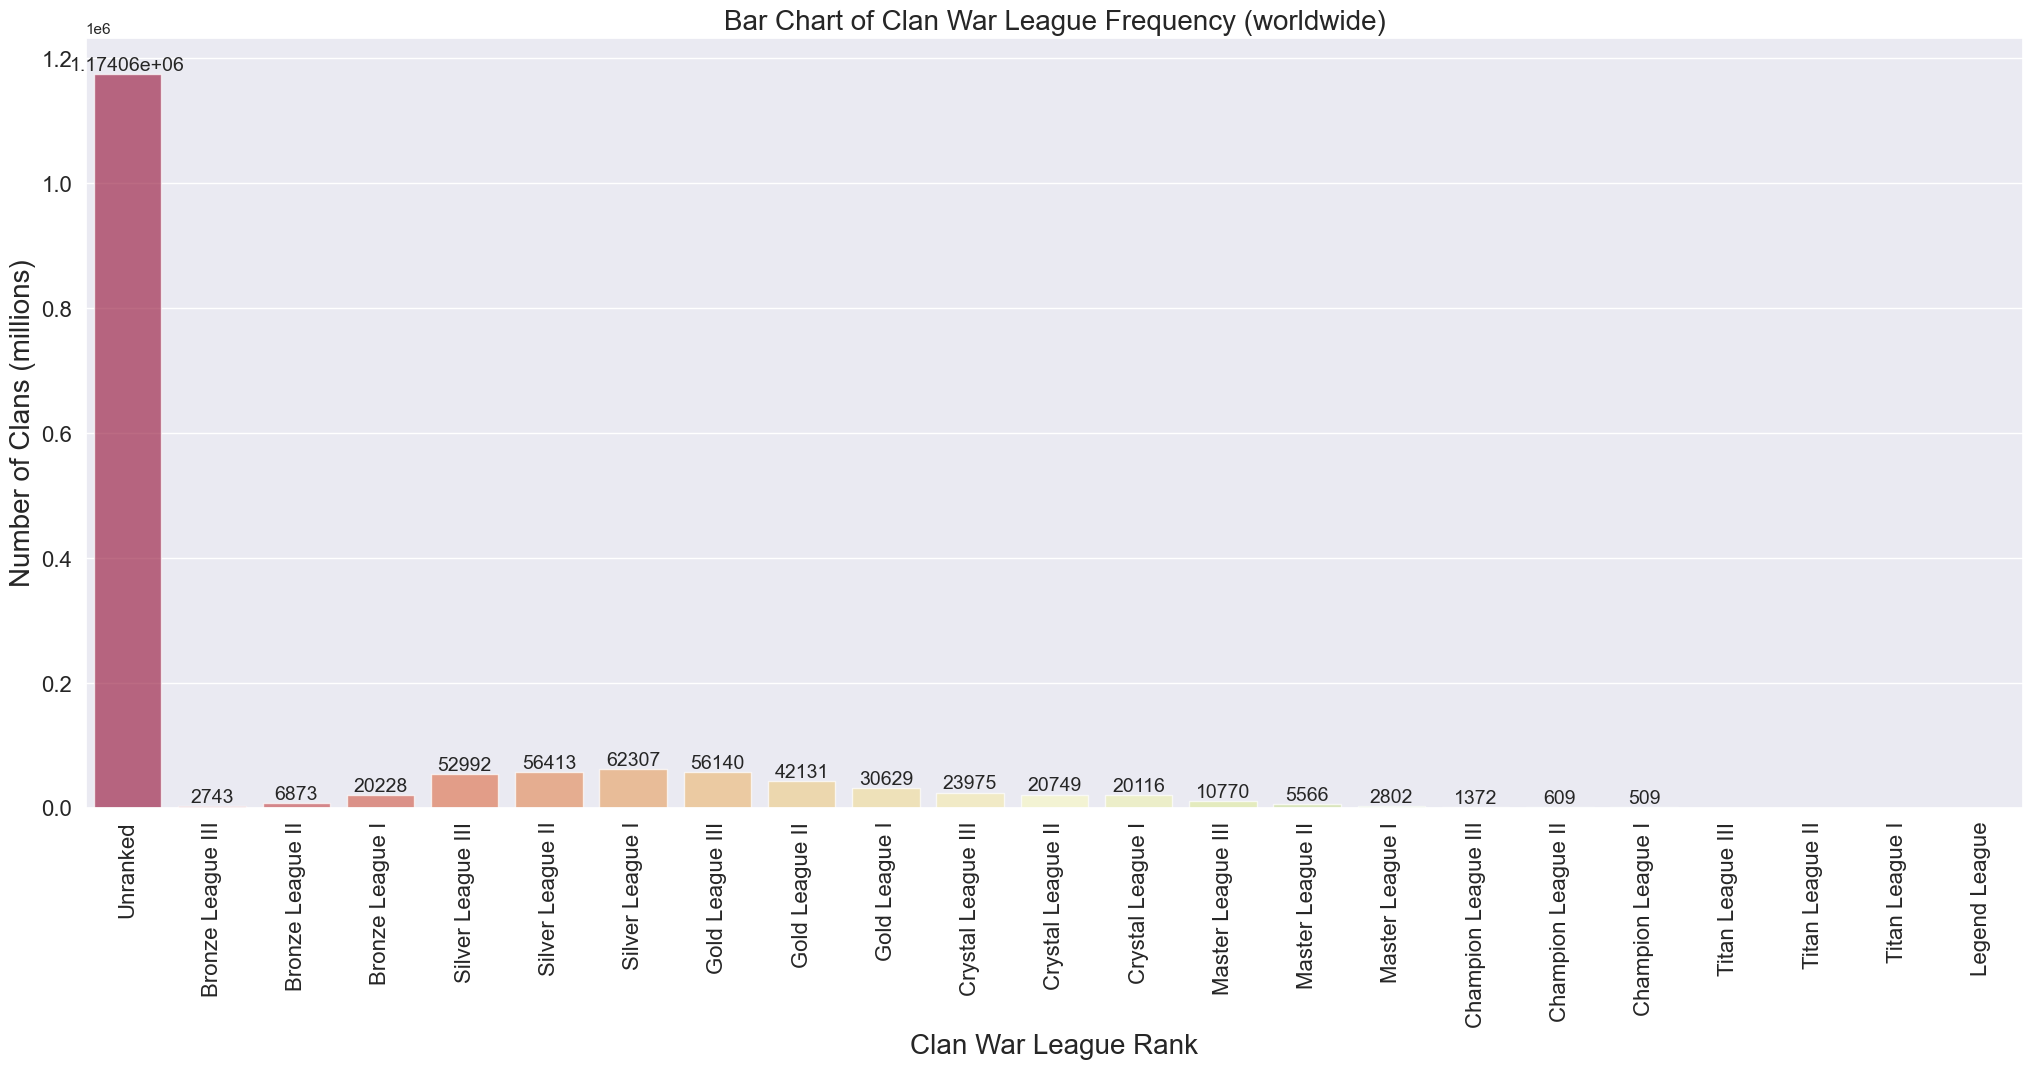

In [91]:
# I want to plot this to have a quick look at the distribution for clan war leagues:
frequency = df_clean['clan_war_league'].value_counts()
rank_index = frequency.index
# I will take all the ranks and custom rank them 
rank_order = ['Unranked', 'Bronze League III', 'Bronze League II', 'Bronze League I', 'Silver League III', 
              'Silver League II', 'Silver League I', 'Gold League III', 'Gold League II', 'Gold League I', 
              'Crystal League III', 'Crystal League II', 'Crystal League I', 'Master League III', 
              'Master League II', 'Master League I', 'Champion League III','Champion League II', 'Champion League I', 
              'Titan League III','Titan League II', 'Titan League I', 'Legend League']

clan_war_bar_chart = sns.barplot(x = rank_index, order = rank_order, y = frequency, palette='Spectral', alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Clan War League Rank', fontsize=20)
plt.ylabel('Number of Clans (millions)', fontsize=20)
plt.title('Bar Chart of Clan War League Frequency (worldwide)', fontsize=20)
clan_war_bar_chart.bar_label(clan_war_bar_chart.containers[0], fontsize=14);

plt.show()

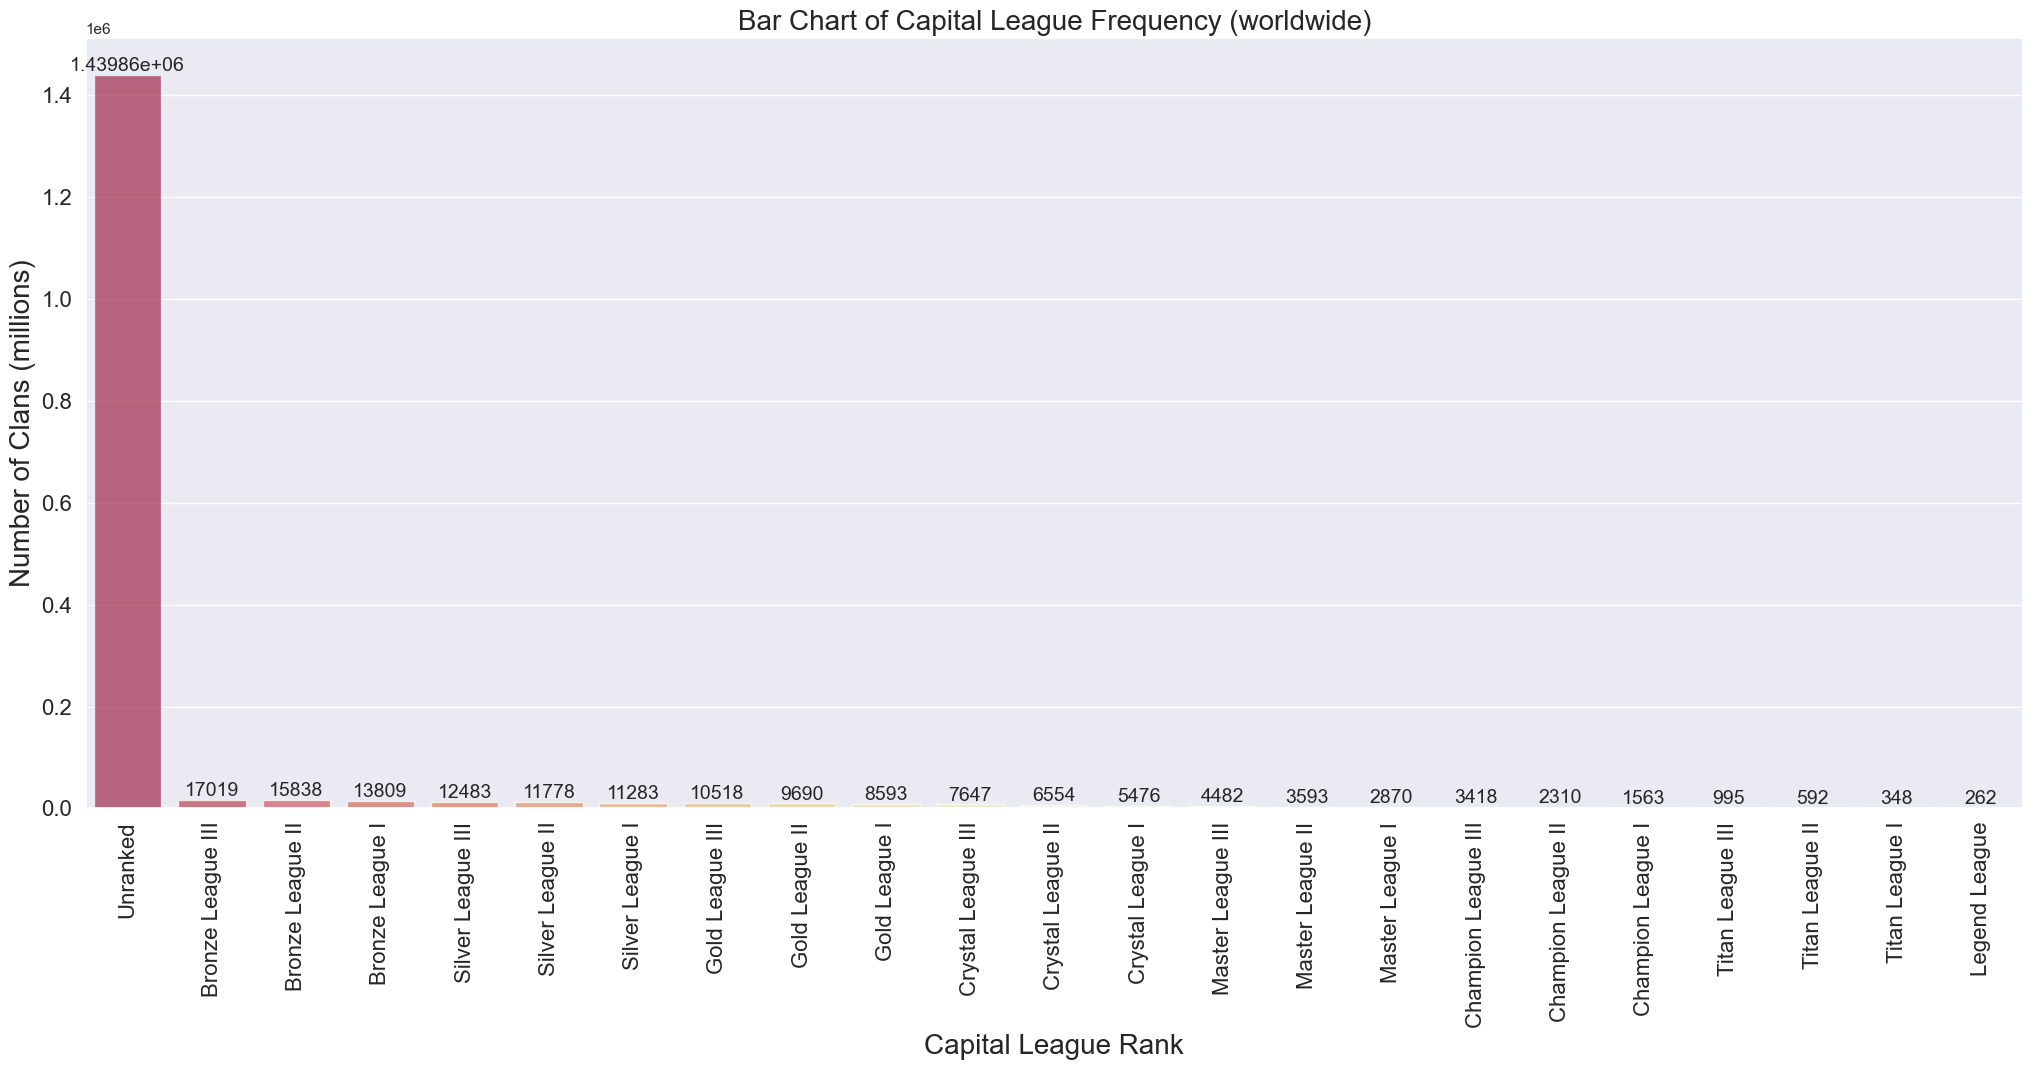

In [12]:
# I did the same for capital league
frequency_cap = df_clean['capital_league'].value_counts()
rank_index_cap = frequency_cap.index

cap_league_bar_chart = sns.barplot(x = rank_index_cap, y = frequency_cap, order = rank_order, palette='Spectral', alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('Capital League Rank', fontsize=20)
plt.ylabel('Number of Clans (millions)', fontsize=20)
plt.title('Bar Chart of Capital League Frequency (worldwide)', fontsize=20)
cap_league_bar_chart.bar_label(cap_league_bar_chart.containers[0], fontsize=14);

plt.show()

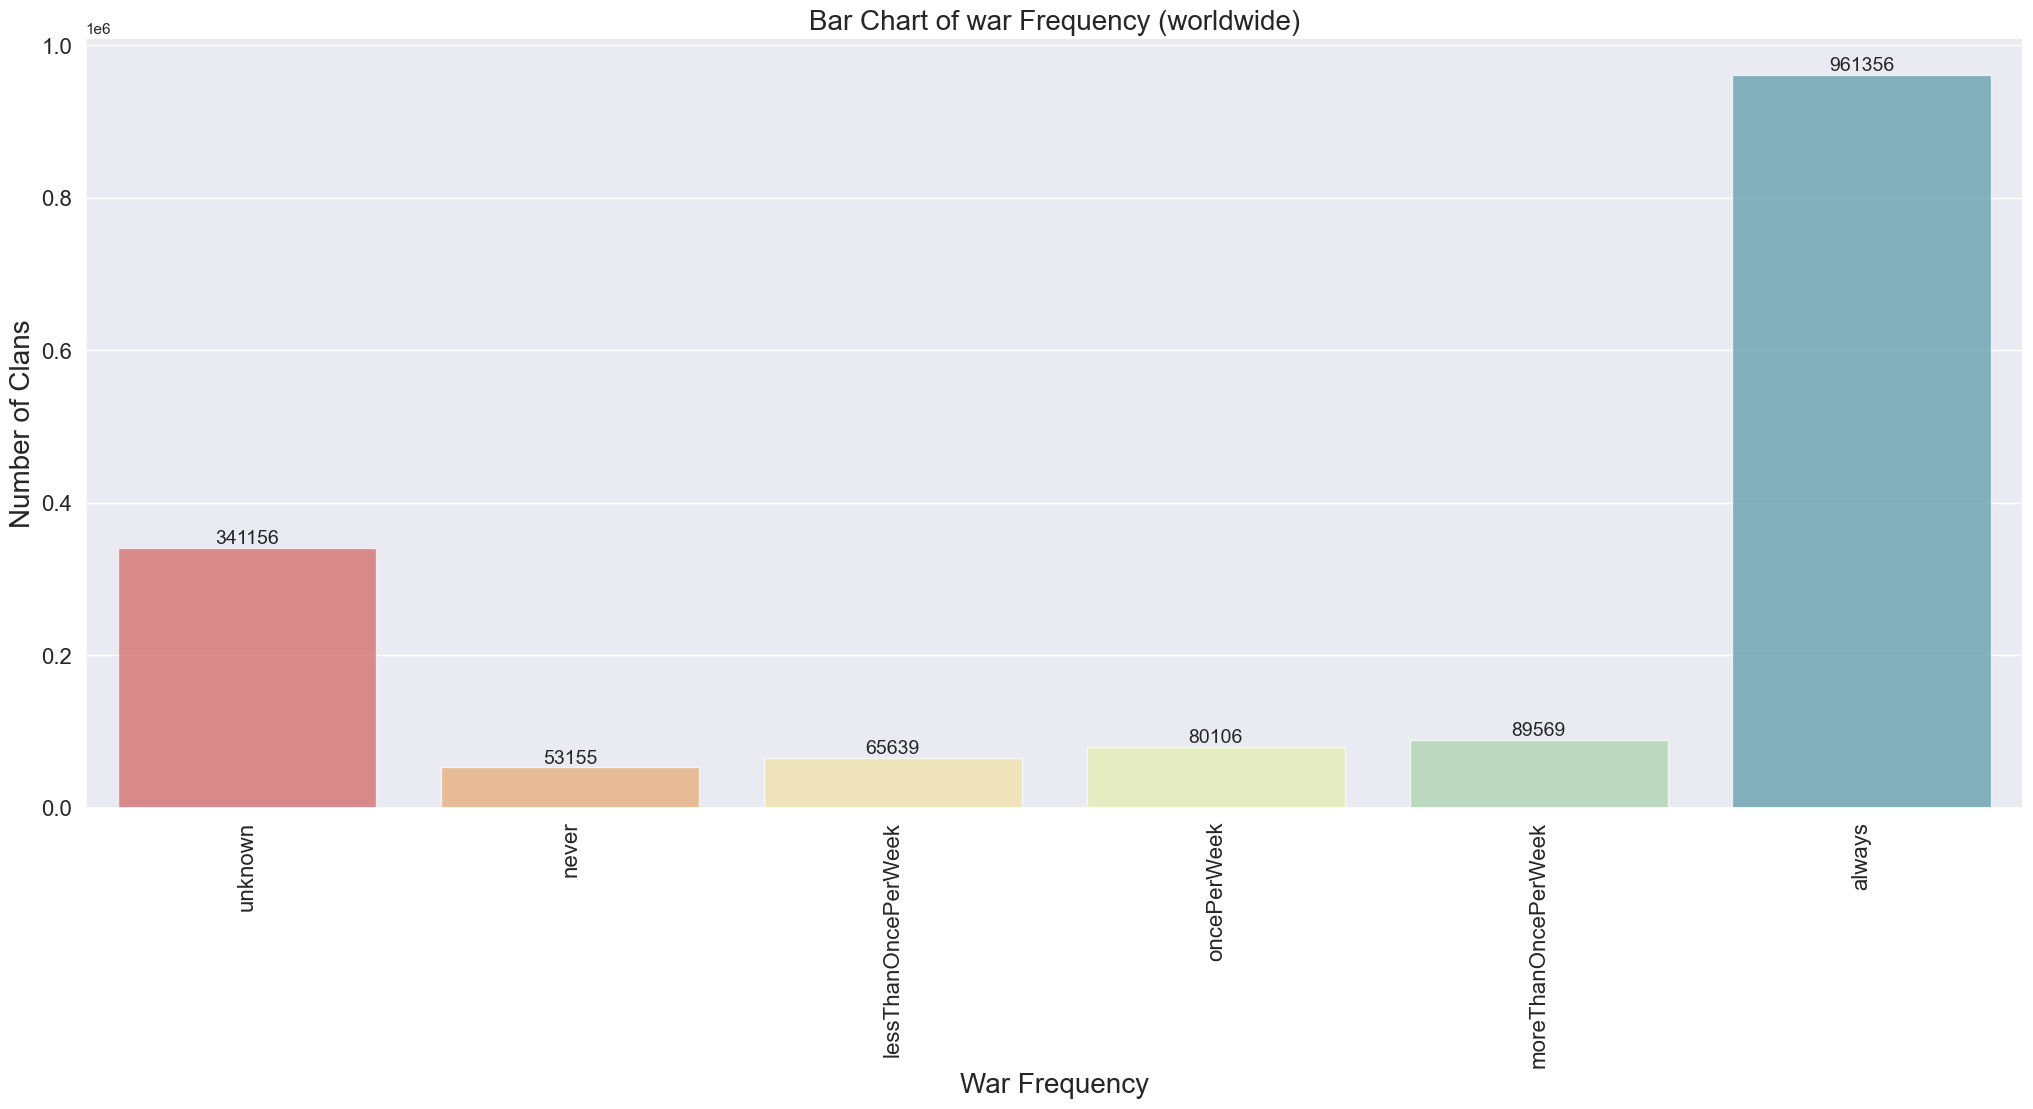

In [13]:
# There is also a measure of how often wars are completed, which I again wanted a bit more graphical insight into:
war_freq = df_clean['war_frequency'].value_counts()
war_freq_index = war_freq.index

war_freq_order = ['unknown', 'never', 'lessThanOncePerWeek', 'oncePerWeek', 'moreThanOncePerWeek', 'always']

war_freq_bar_chart = sns.barplot(x = war_freq_index, y = war_freq, order = war_freq_order, palette='Spectral', alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('War Frequency', fontsize=20)
plt.ylabel('Number of Clans', fontsize=20)
plt.title('Bar Chart of war Frequency (worldwide)', fontsize=20)
war_freq_bar_chart.bar_label(war_freq_bar_chart.containers[0], fontsize=14);

plt.show()

### Comments:

It seems the majority of clans fall into the 'Unknown' ranks which will largely skew the data and so I will be removing these rows. Also for `war_frequency`, the 'Unknown' here is reundant, so I will also be dropping these rows.

-------------------------------------

In [14]:
#Due to the abundance of Unranked clans in both clan wars and capital league, it will largely skew data. 
# Also, for war_frequency, 'unknown' is redunant.
# I will remove these from the dataset. 
df_filtered = df_clean[
    (df_clean['clan_war_league'] != 'Unranked') & 
    (df_clean['capital_league'] != 'Unranked') & 
    (df_clean['war_frequency'] != 'unknown')
]

print(df_filtered.shape)

(131141, 27)


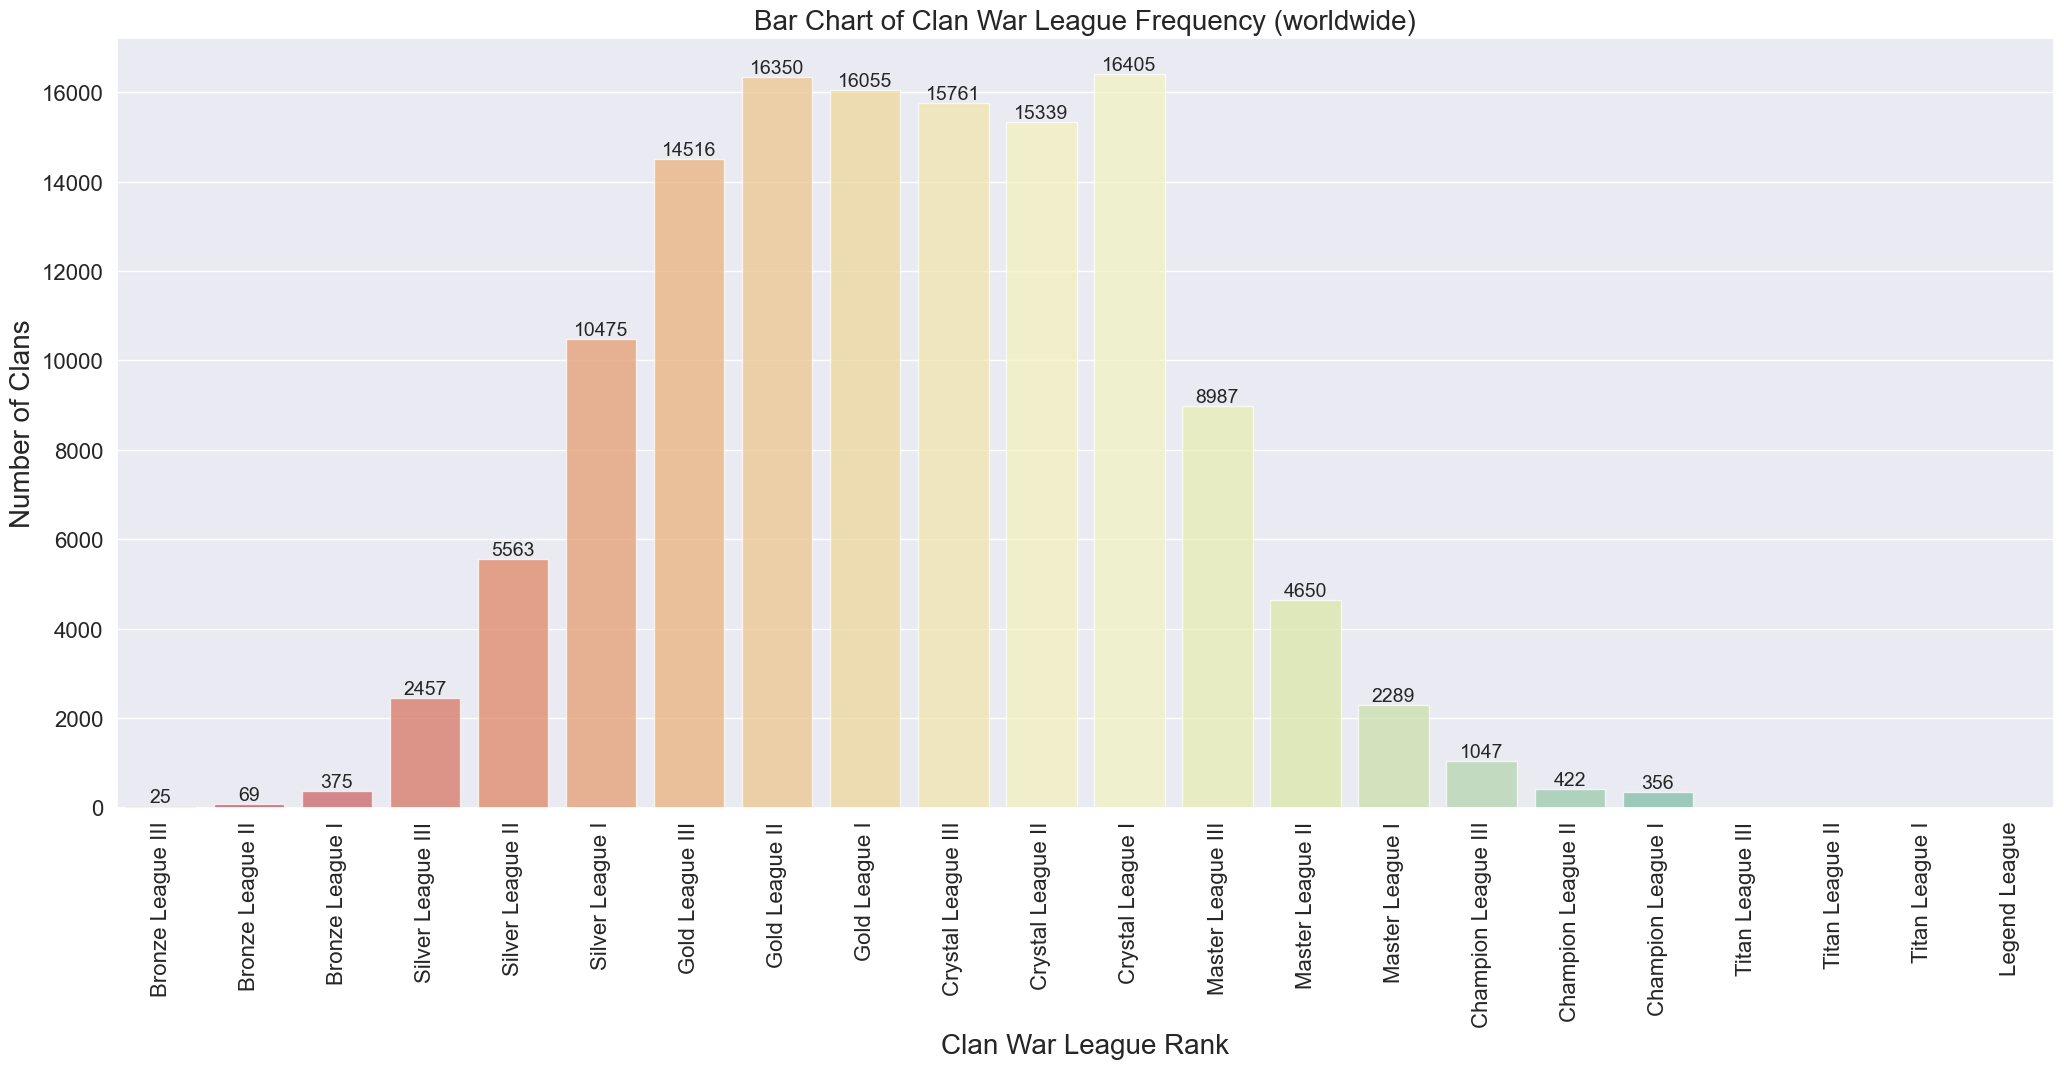

In [144]:
frequency = df_filtered['clan_war_league'].value_counts()
rank_index = frequency.index

new_rank_order = ['Bronze League III', 'Bronze League II', 'Bronze League I', 'Silver League III', 
              'Silver League II', 'Silver League I', 'Gold League III', 'Gold League II', 'Gold League I', 
              'Crystal League III', 'Crystal League II', 'Crystal League I', 'Master League III', 
              'Master League II', 'Master League I', 'Champion League III','Champion League II', 'Champion League I', 
              'Titan League III','Titan League II', 'Titan League I', 'Legend League']

clan_war_bar_chart = sns.barplot(x = rank_index, order = new_rank_order, y = frequency, palette='Spectral', alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Clan War League Rank', fontsize=20)
plt.ylabel('Number of Clans', fontsize=20)
plt.title('Bar Chart of Clan War League Frequency (worldwide)', fontsize=20)
clan_war_bar_chart.bar_label(clan_war_bar_chart.containers[0], fontsize=14);

plt.savefig('graphs/Clan_War_League_Freq_BAR.png', bbox_inches='tight', pad_inches=0.5)

plt.show()

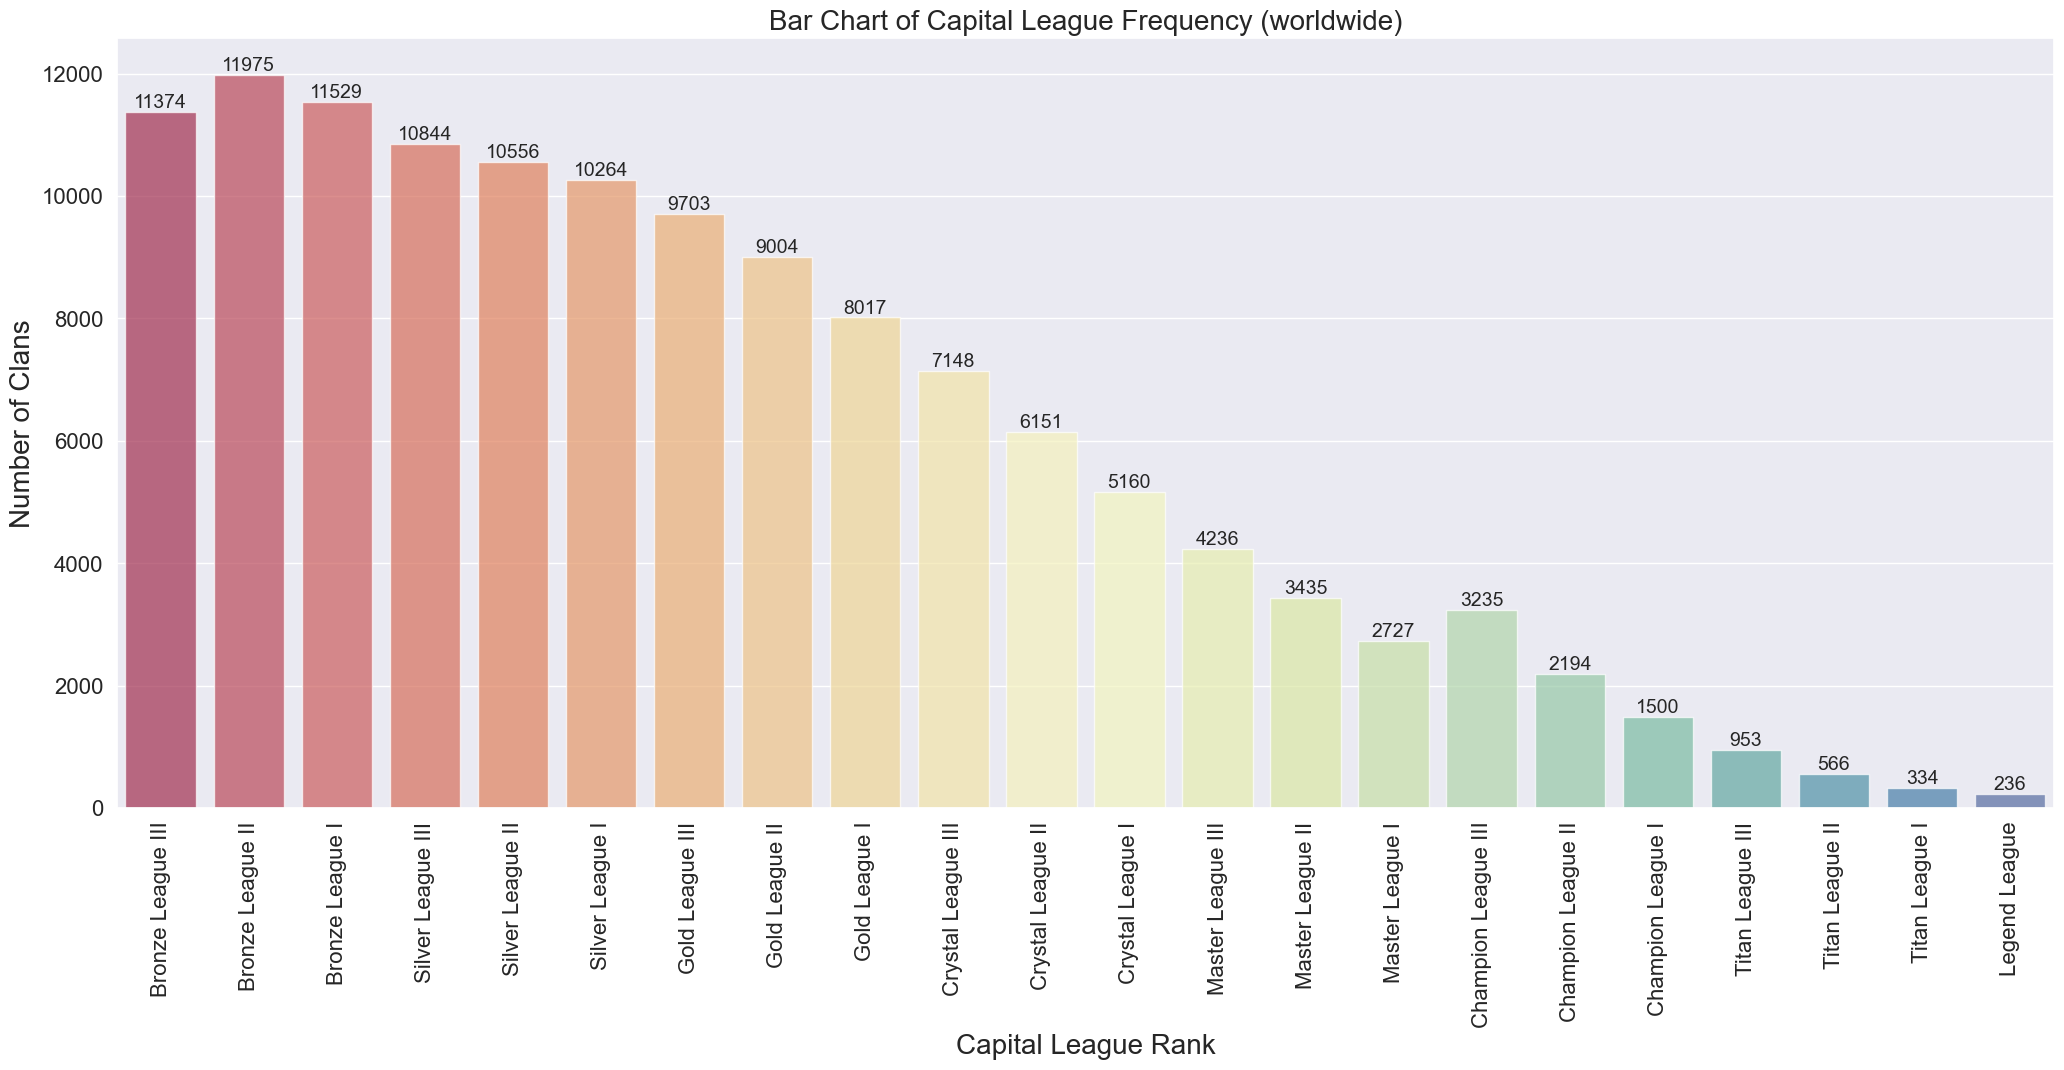

In [145]:
frequency_cap = df_filtered['capital_league'].value_counts()
rank_index_cap = frequency_cap.index

cap_league_bar_chart = sns.barplot(x = rank_index_cap, y = frequency_cap, order = new_rank_order, palette='Spectral', 
                                   alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('Capital League Rank', fontsize=20)
plt.ylabel('Number of Clans', fontsize=20)
plt.title('Bar Chart of Capital League Frequency (worldwide)', fontsize=20)
cap_league_bar_chart.bar_label(cap_league_bar_chart.containers[0], fontsize=14);

plt.savefig('graphs/Capital_League_Freq_BAR.png', bbox_inches='tight', pad_inches=0.5)

plt.show()

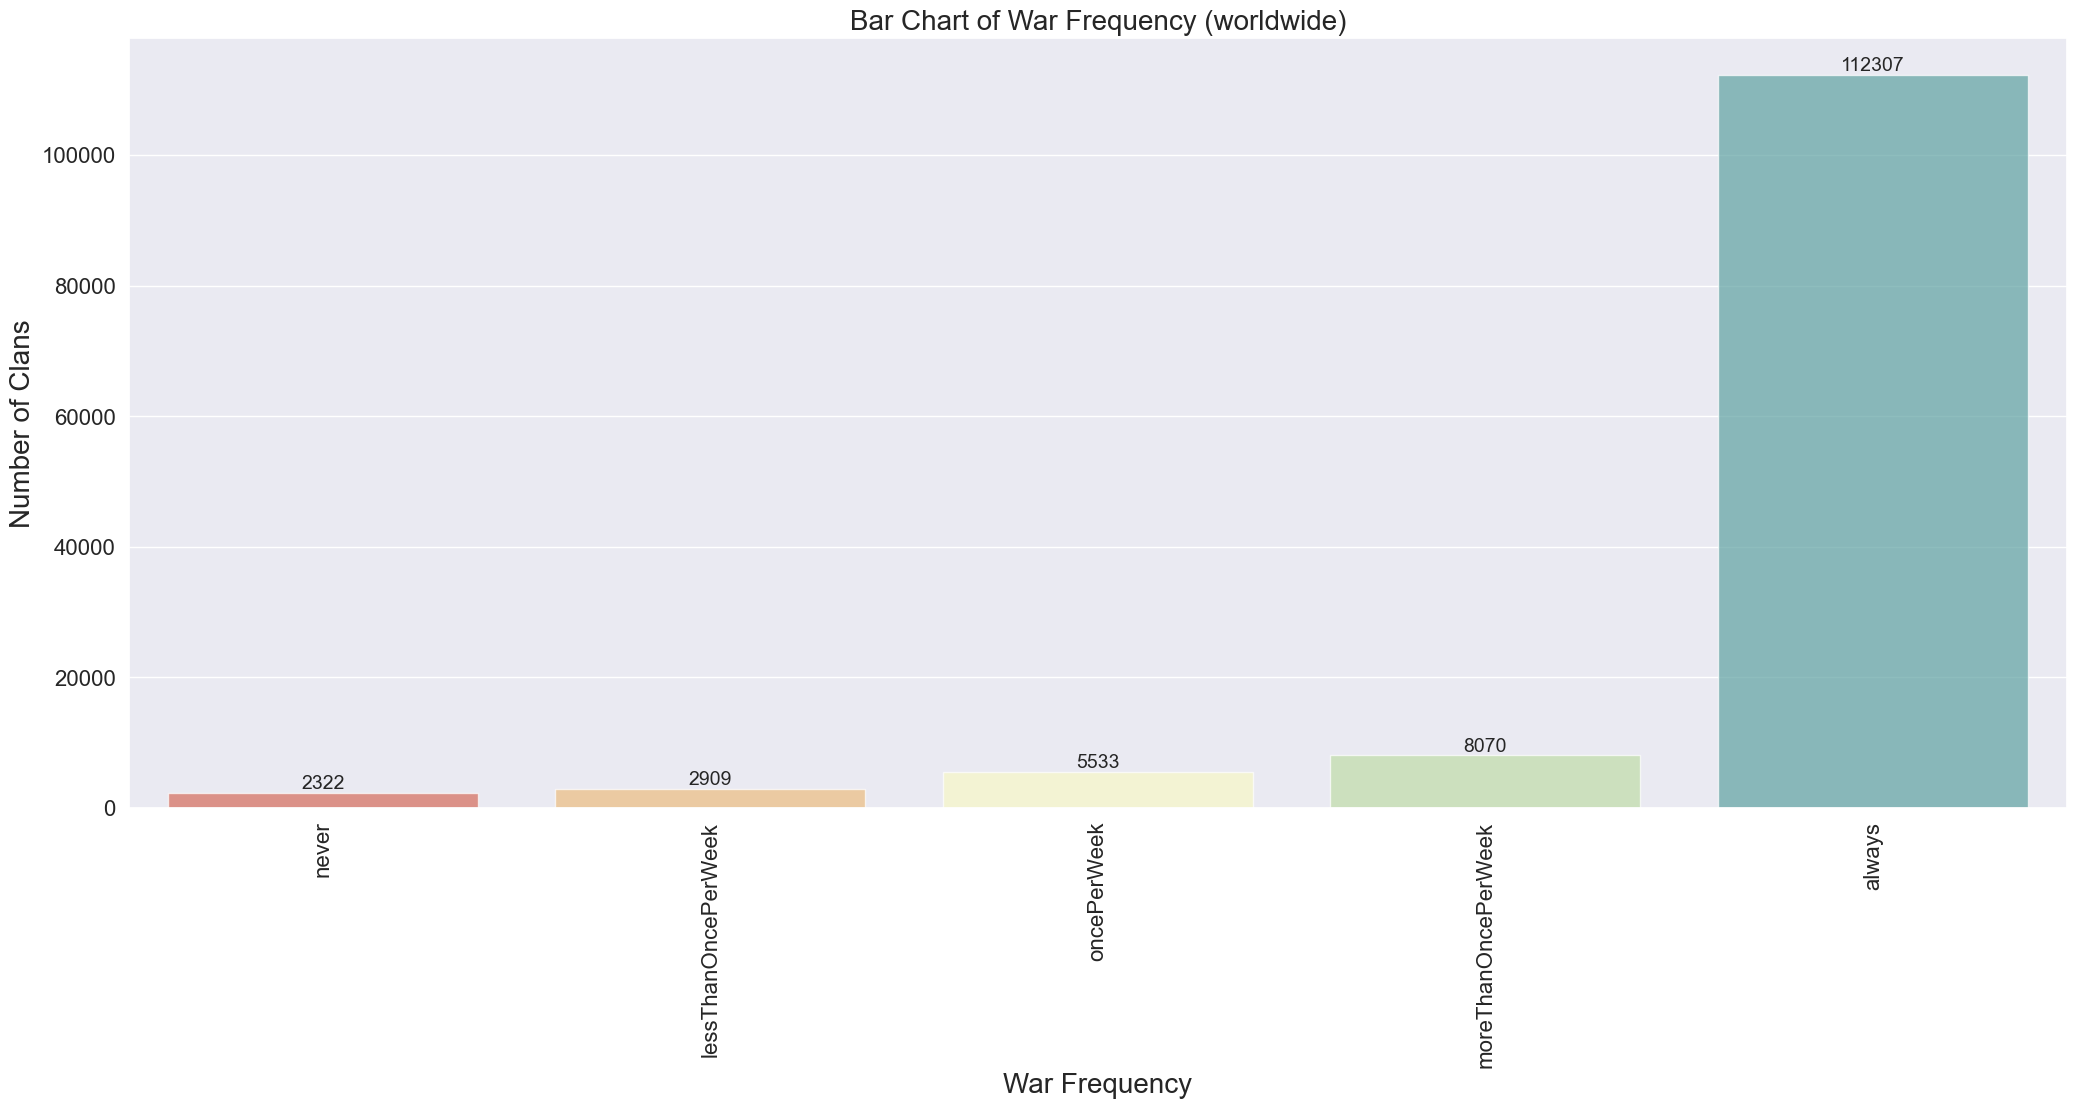

In [146]:
war_freq = df_filtered['war_frequency'].value_counts()
war_freq_index = war_freq.index

new_war_freq_order = ['never', 'lessThanOncePerWeek', 'oncePerWeek', 'moreThanOncePerWeek', 'always']

war_freq_bar_chart = sns.barplot(x = war_freq_index, y = war_freq, order = new_war_freq_order, palette='Spectral', alpha = 0.7)
sns.set(rc = {'figure.figsize':(25, 10)})
plt.xticks(rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(rotation='vertical')
plt.xlabel('War Frequency', fontsize=20)
plt.ylabel('Number of Clans', fontsize=20)
plt.title('Bar Chart of War Frequency (worldwide)', fontsize=20)

war_freq_bar_chart.bar_label(war_freq_bar_chart.containers[0], fontsize=14);

plt.savefig('graphs/War_Freq_BAR.png', bbox_inches='tight', pad_inches=0.5)

plt.show()

### Comments:

For these three columns (`clan_war_league`, `capital_league` and `war_frequency`), as they are string inputs, this would make it hard to look for relationships between these and the other columns present in the dataset. So I will be creating some dummy variables and mapping them into new columns. 


In [18]:
# will need to quantify rank at some point to compare to quantitive measures e.g. level or points

df_new = df_filtered.copy()

rank_mapping = {'Bronze League III': 1, 'Bronze League II': 2, 'Bronze League I': 3, 'Silver League III': 4,
    'Silver League II': 5, 'Silver League I': 6, 'Gold League III': 7, 'Gold League II': 8, 'Gold League I': 9,
    'Crystal League III': 10, 'Crystal League II': 11, 'Crystal League I': 12, 'Master League III': 13, 'Master League II': 14,
    'Master League I': 15, 'Champion League III': 16, 'Champion League II': 17, 'Champion League I': 18, 'Titan League III': 19,
    'Titan League II': 20, 'Titan League I': 21, 'Legend League': 22}

war_freq_mapping = {'never': 1, 'lessThanOncePerWeek': 2, 'oncePerWeek': 3, 'moreThanOncePerWeek': 4, 'always': 5}

df_new['rank_number_war'] = df_new['clan_war_league'].map(rank_mapping)
df_new['rank_number_capital'] = df_new['capital_league'].map(rank_mapping)
df_new['war_freq_number'] = df_new['war_frequency'].map(war_freq_mapping)
df_new.reset_index(drop=True, inplace=True)
df_new.head()

clan_tag        clan_name   clan_type  \
0  #2LJUYQV0Q     ACE of SPADE      closed   
1   #8V9PQV20        ZAR Elite  inviteOnly   
2  #2QGRR090L   KLEN KHUSUSNYA        open   
3    #JJR8UUV  ⭐️les fhommes⭐️  inviteOnly   
4  #2Q8LP92CJ       2/3 ginger  inviteOnly   

                                    clan_description  clan_location  \
0                       kung d ka pogi bawal ka dito  International   
1  Welcome to our clan. Be friendly, loyal and re...   South Africa   
2  WALCOME TO KLEN KHUSUSNYA GUYS. WAJIB ATTACK W...  International   
3  Clan sympathique plutôt adultes on est cool sa...         France   
4                                     coolguy is mid  United States   

   isFamilyFriendly                                     clan_badge_url  \
0              True  https://api-assets.clashofclans.com/badges/200...   
1              True  https://api-assets.clashofclans.com/badges/200...   
2              True  https://api-assets.clashofclans.com/badges/200...   
3              True  https://api-assets.clashofclans.com/badges/200...   
4              True  https://api-assets.clashofclans.com/badges/200...   

   clan_level  clan_points  clan_builder_base_points  ...  \
0           3        14771                     13677  ...   
1          20        28310                     31626  ...   
2           9        22185                     21186  ...   
3          20        38394                     36002  ...   
4           5        23750                     23595  ...   

   required_versus_trophies  required_townhall_level clan_capital_hall_level  \
0                      1100                       12                       3   
1                      2000                       10                       9   
2                       600                        8                       6   
3                      2400                       11                       9   
4                         0                        2                       3   

   clan_capital_points     capital_league  mean_member_level  \
0                  549   Bronze League II                 92   
1                 1494    Gold League III                160   
2                  484   Bronze League II                 87   
3                 1961      Gold League I                167   
4                  834  Silver League III                117   

   mean_member_trophies rank_number_war  rank_number_capital  war_freq_number  
0                  1746               7                    2                3  
1                  2502              12                    7                4  
2                  1770               8                    2                5  
3                  3018              12                    9                4  
4                  2089               7                    4                2  

[5 rows x 30 columns]

In [21]:
# checking that the new columns created are integers
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131141 entries, 0 to 131140
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   clan_tag                        131141 non-null  object
 1   clan_name                       131141 non-null  object
 2   clan_type                       131141 non-null  object
 3   clan_description                131141 non-null  object
 4   clan_location                   131141 non-null  object
 5   isFamilyFriendly                131141 non-null  bool  
 6   clan_badge_url                  131141 non-null  object
 7   clan_level                      131141 non-null  int64 
 8   clan_points                     131141 non-null  int64 
 9   clan_builder_base_points        131141 non-null  int64 
 10  clan_versus_points              131141 non-null  int64 
 11  required_trophies               131141 non-null  int64 
 12  war_frequency                 

### Correlational matrix to identify trends:

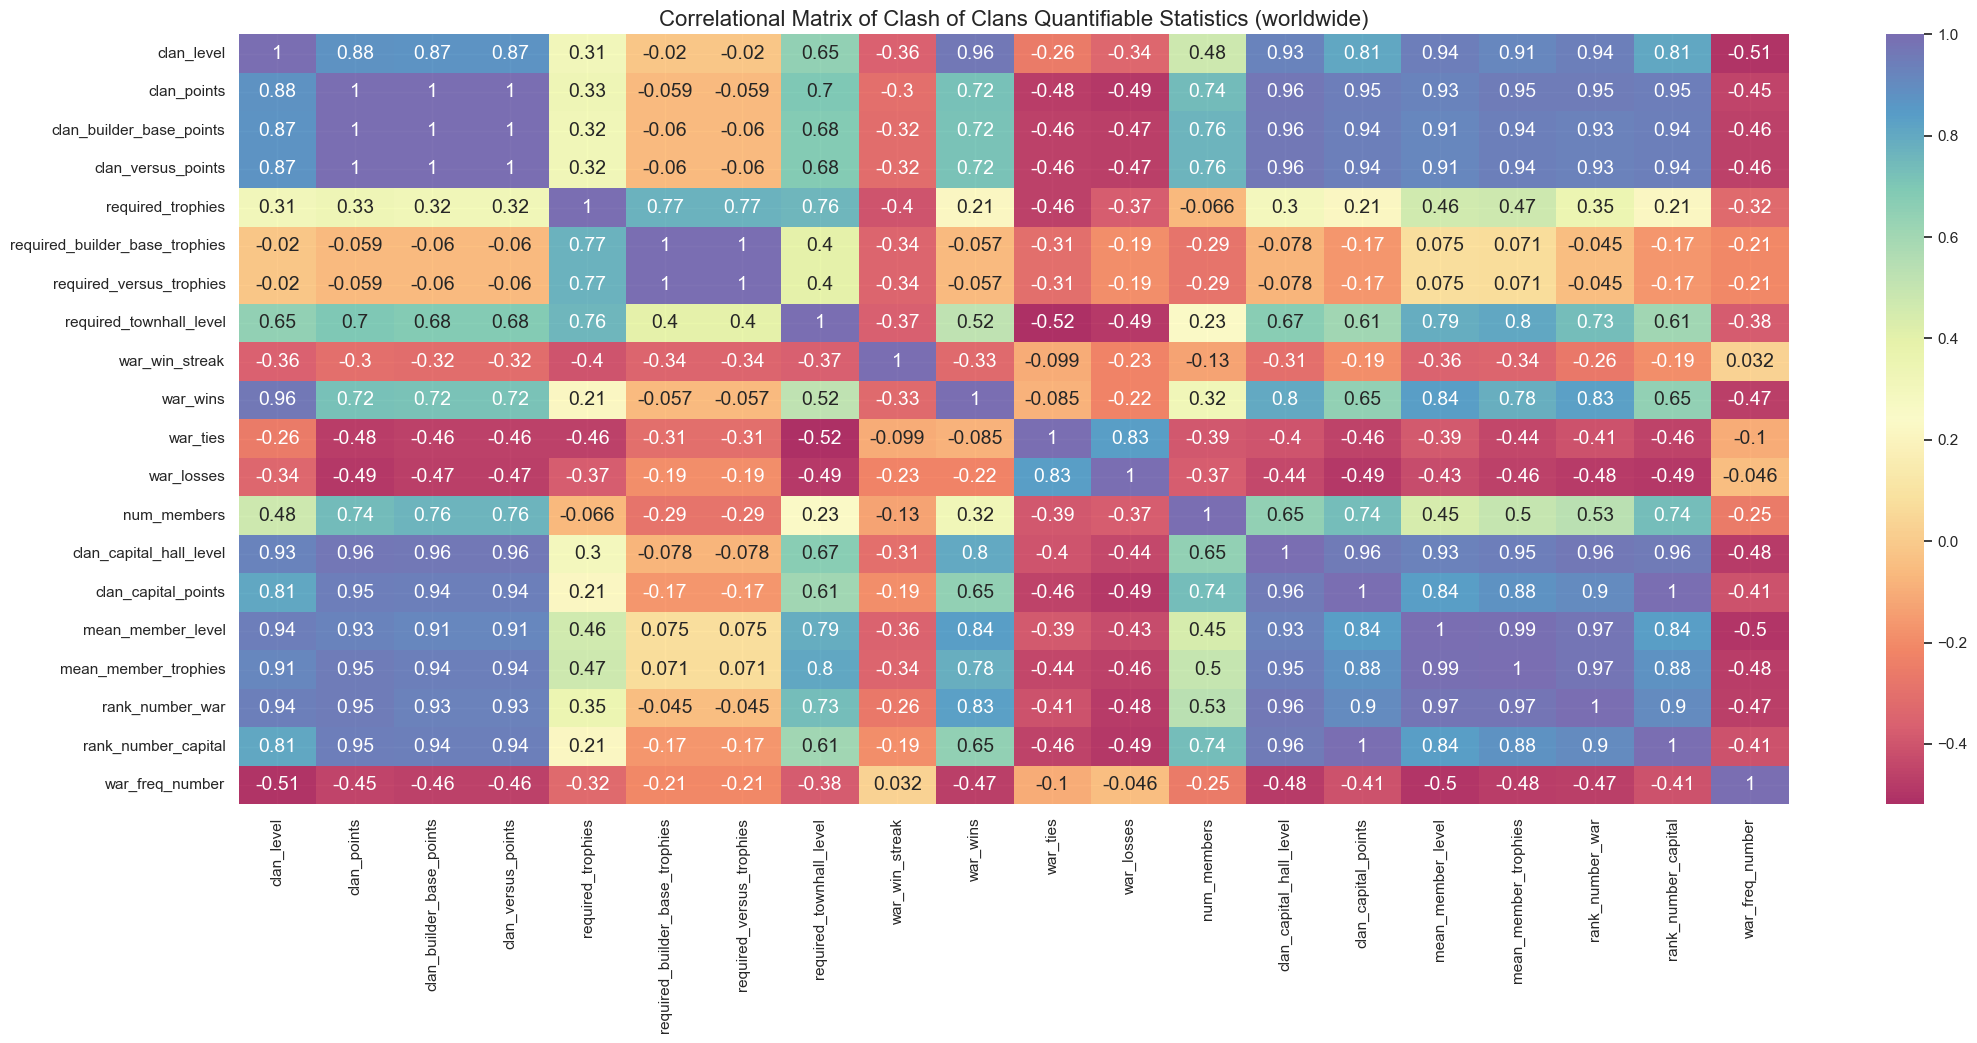

In [22]:
#correlational matrix, including the newly defined ranks!
chosen_cols = ['clan_level', 'clan_points', 'clan_builder_base_points', 'clan_versus_points', 'required_trophies',
               'required_builder_base_trophies','required_versus_trophies', 'required_townhall_level',
               'war_win_streak', 'war_wins', 'war_ties', 'war_losses', 'num_members',
               'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level',
               'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 'war_freq_number']

data = df_new[chosen_cols].corr(method = 'spearman')
corr_matrix = sns.heatmap(data.corr(), cmap="Spectral", annot=True, annot_kws={"size": 14}, alpha = 0.8)
sns.set(rc = {'figure.figsize':(20, 10)}, font_scale= 1.25)
plt.title('Correlational Matrix of Clash of Clans Quantifiable Statistics (worldwide)', fontsize=16)


plt.show()

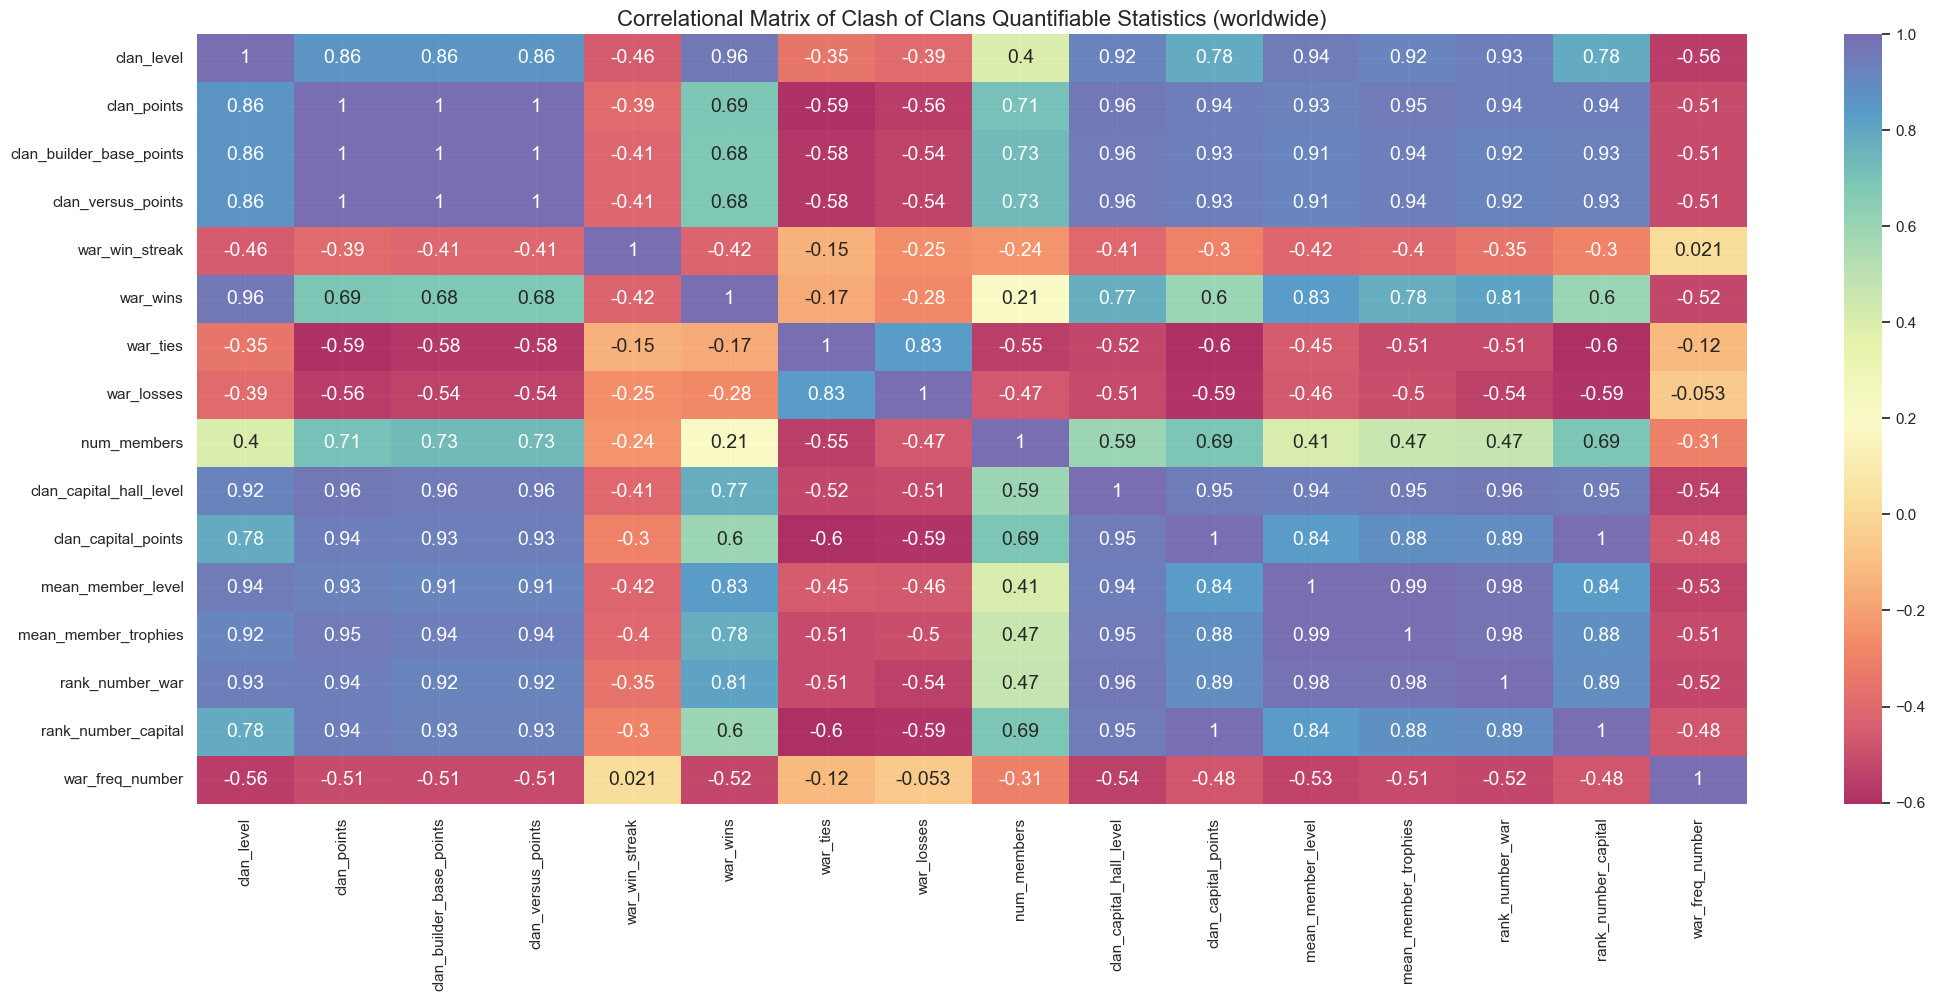

In [147]:
#Re-ran the correlational matrix without the 'requirement' columns as they don't give much information:
chosen_cols = ['clan_level', 'clan_points', 'clan_builder_base_points', 'clan_versus_points',
               'war_win_streak', 'war_wins', 'war_ties', 'war_losses', 'num_members',
               'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level',
               'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 'war_freq_number']

data = df_new[chosen_cols].corr(method = 'spearman')
corr_matrix = sns.heatmap(data.corr(), cmap="Spectral", annot=True, annot_kws={"size": 14}, alpha = 0.8)
sns.set(rc = {'figure.figsize':(20, 10)}, font_scale= 1.25)
plt.title('Correlational Matrix of Clash of Clans Quantifiable Statistics (worldwide)', fontsize=16)

plt.savefig('graphs/Corr_Matrix.png', bbox_inches='tight', pad_inches=0.5)

plt.show()

In [24]:
# The 'war_freq_number' column seems to be giving a lot of negative correlations, out of curiousity I wanted a bit more insight
# into what was happening here. 
# I created dummy variables again, but this time each unique value had its own column:
dummy_df = pd.get_dummies(df_new['war_frequency'], prefix='war_frequency')
df_with_dummies = pd.concat([df_new, dummy_df], axis=1)

df_with_dummies.head()

clan_tag        clan_name   clan_type  \
0  #2LJUYQV0Q     ACE of SPADE      closed   
1   #8V9PQV20        ZAR Elite  inviteOnly   
2  #2QGRR090L   KLEN KHUSUSNYA        open   
3    #JJR8UUV  ⭐️les fhommes⭐️  inviteOnly   
4  #2Q8LP92CJ       2/3 ginger  inviteOnly   

                                    clan_description  clan_location  \
0                       kung d ka pogi bawal ka dito  International   
1  Welcome to our clan. Be friendly, loyal and re...   South Africa   
2  WALCOME TO KLEN KHUSUSNYA GUYS. WAJIB ATTACK W...  International   
3  Clan sympathique plutôt adultes on est cool sa...         France   
4                                     coolguy is mid  United States   

   isFamilyFriendly                                     clan_badge_url  \
0              True  https://api-assets.clashofclans.com/badges/200...   
1              True  https://api-assets.clashofclans.com/badges/200...   
2              True  https://api-assets.clashofclans.com/badges/200...   
3              True  https://api-assets.clashofclans.com/badges/200...   
4              True  https://api-assets.clashofclans.com/badges/200...   

   clan_level  clan_points  clan_builder_base_points  ...  mean_member_level  \
0           3        14771                     13677  ...                 92   
1          20        28310                     31626  ...                160   
2           9        22185                     21186  ...                 87   
3          20        38394                     36002  ...                167   
4           5        23750                     23595  ...                117   

   mean_member_trophies rank_number_war  rank_number_capital  war_freq_number  \
0                  1746               7                    2                3   
1                  2502              12                    7                4   
2                  1770               8                    2                5   
3                  3018              12                    9                4   
4                  2089               7                    4                2   

   war_frequency_always  war_frequency_lessThanOncePerWeek  \
0                     0                                  0   
1                     0                                  0   
2                     1                                  0   
3                     0                                  0   
4                     0                                  1   

  war_frequency_moreThanOncePerWeek  war_frequency_never  \
0                                 0                    0   
1                                 1                    0   
2                                 0                    0   
3                                 1                    0   
4                                 0                    0   

   war_frequency_oncePerWeek  
0                          1  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 35 columns]

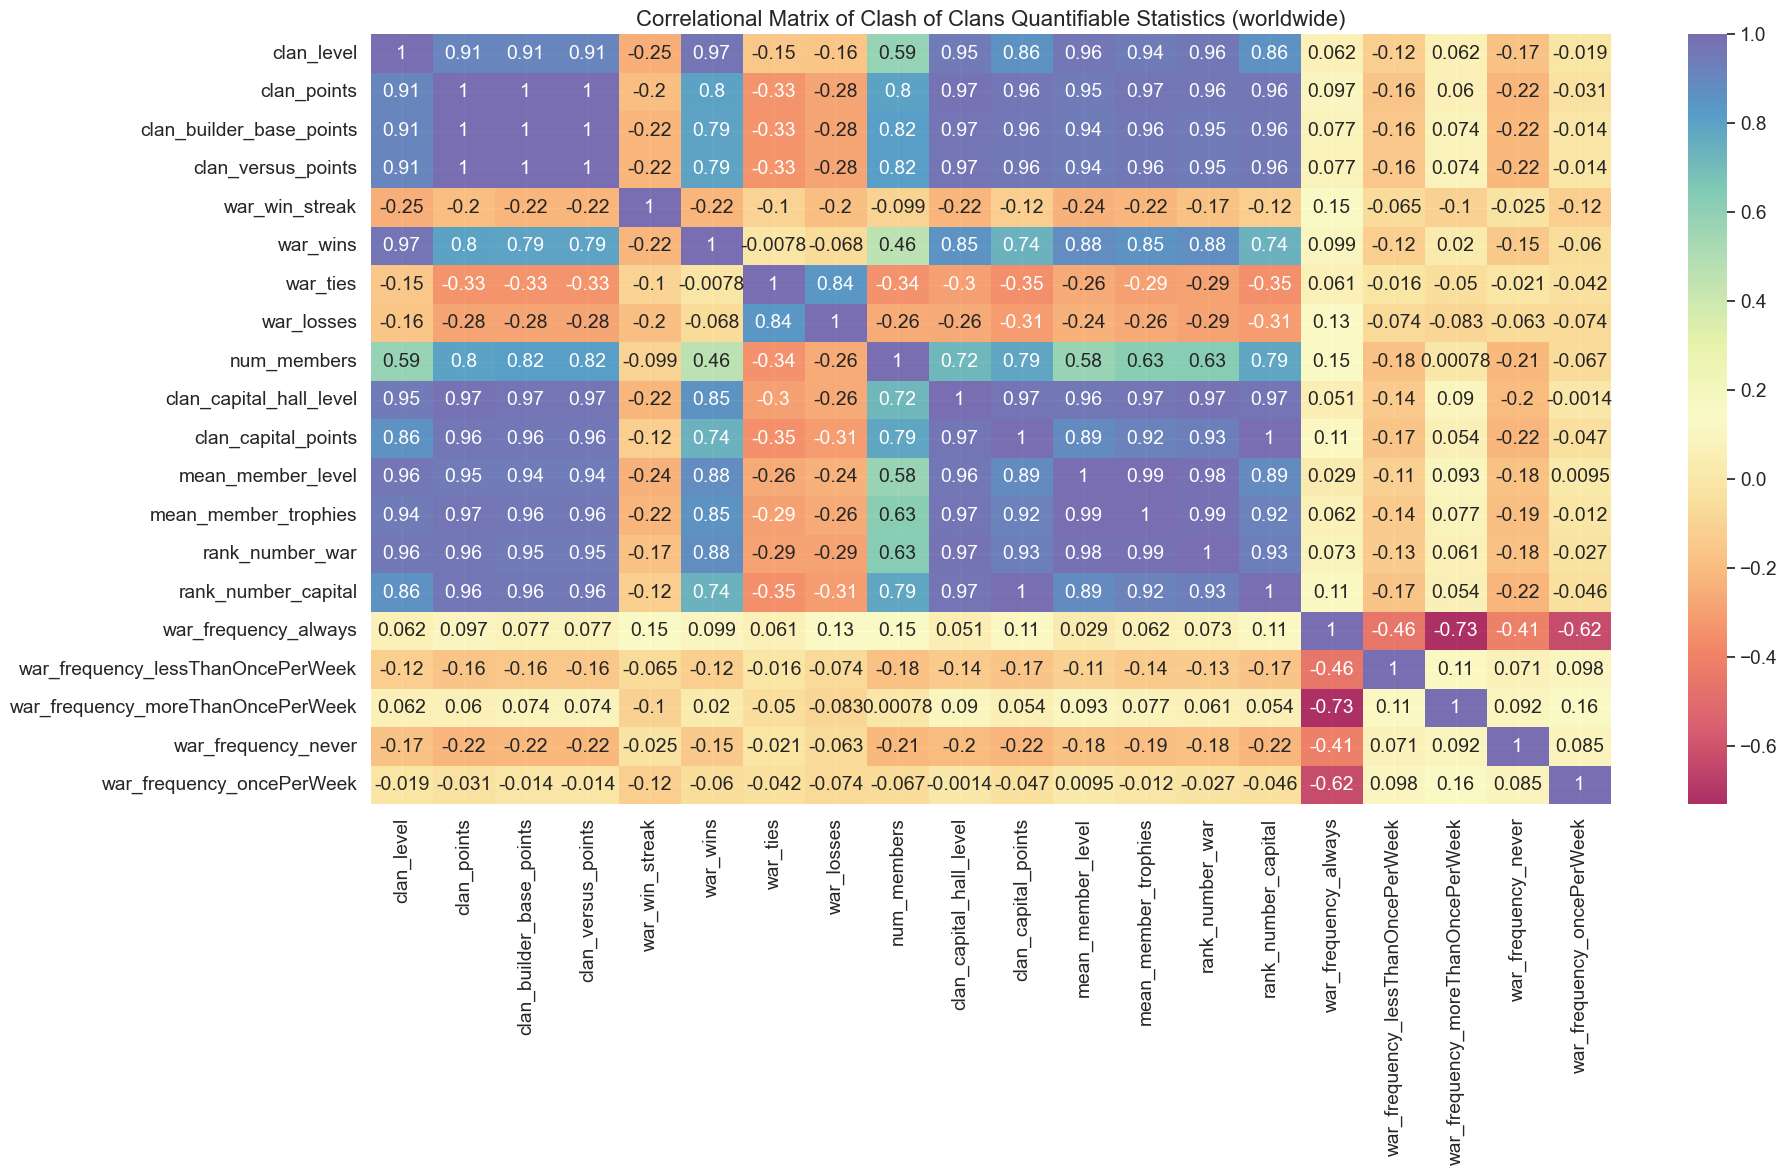

In [25]:
#correlational matrix with new dummy variables:
chosen_cols = ['clan_level', 'clan_points', 'clan_builder_base_points', 'clan_versus_points',
               'war_win_streak', 'war_wins', 'war_ties', 'war_losses', 'num_members',
               'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level',
               'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 'war_frequency_always',
              'war_frequency_lessThanOncePerWeek', 'war_frequency_moreThanOncePerWeek', 'war_frequency_never', 
               'war_frequency_oncePerWeek']

data = df_with_dummies[chosen_cols].corr(method = 'spearman')
corr_matrix = sns.heatmap(data.corr(), cmap="Spectral", annot=True, annot_kws={"size": 14}, alpha = 0.8)
sns.set(rc = {'figure.figsize':(20, 10)}, font_scale= 1.25)
plt.title('Correlational Matrix of Clash of Clans Quantifiable Statistics (worldwide)', fontsize=16)


plt.show()

### Comments:

First of all, individually, it seems that the frequency of wars does not correlate heavily with other regressors, and so these will not be further assessed. Also, many features such as member level, trophy numbers and ranks are highly correlated with each other hence are likley to display multicollinarity. From the matrix, it seems the most interesting are the war outcomes e.g. war wins, losses and ties. 

Note: After some careful research, I think information in this dataset regarding `clan_builder_hall_points` and `clan_versus_points` are quite vague, as these do not involve clan activity. The reported numbers hence do not provide enough information so I will omit this from analysis. 

I will run a VIF test on these columns to test for multicollinarity first.

### Multicollinarity:

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select independent variables
x = df_new[['clan_points', 'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level',
               'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 'war_wins', 'war_ties', 'war_losses']]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["features"] = x.columns
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif

features  VIF Factor
0              clan_points   46.742502
1  clan_capital_hall_level   37.089757
2      clan_capital_points  485.112327
3        mean_member_level  186.547078
4     mean_member_trophies  193.688279
5          rank_number_war   46.900374
6      rank_number_capital  467.515635
7                 war_wins    3.680835
8                 war_ties    1.291304
9               war_losses    1.900290

### Next Steps:

From the output, it seems I was correct, and so I will now proceed with further insights into the war outcomes.

In [333]:
# creating a new dataframe of the regressor I am interested in:
war_df = df_new[['clan_tag', 'clan_points', 'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level',
               'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 'war_wins', 'war_ties', 'war_losses']].copy()

In [234]:
war_df.head()

clan_tag  clan_points  clan_capital_hall_level  clan_capital_points  \
0  #2LJUYQV0Q        14771                        3                  549   
1   #8V9PQV20        28310                        9                 1494   
2  #2QGRR090L        22185                        6                  484   
3    #JJR8UUV        38394                        9                 1961   
4  #2Q8LP92CJ        23750                        3                  834   

   mean_member_level  mean_member_trophies  rank_number_war  \
0                 92                  1746                7   
1                160                  2502               12   
2                 87                  1770                8   
3                167                  3018               12   
4                117                  2089                7   

   rank_number_capital  war_wins  war_ties  war_losses  
0                    2        10         1           6  
1                    7       261         0           0  
2                    2        73         0           0  
3                    9       207         0           0  
4                    4        38         0           0

### Normality:
Given the nature of the data, I expect the data to be non-parametric. I will check this using a normality test. 

In [314]:
from scipy import stats

normality_df = pd.DataFrame(columns=['Shapiro-Wilk Test', 'p-value'])

to_test = ['clan_points', 'clan_capital_hall_level', 'clan_capital_points', 'mean_member_level', 
                     'mean_member_trophies', 'rank_number_war', 'rank_number_capital', 
                     'war_wins', 'war_losses', 'war_ties']

def sw_test(rows):
    for i in rows:
        data = war_df[i].values
        statistic, p_value = stats.shapiro(data)
        normality_df.loc[i, ('Shapiro-Wilk Test')] = statistic
        normality_df.loc[i, ('p-value')] = p_value

sw_test(to_test)
normality_df

C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\chloe\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\chloe\anaconda3\lib\site-packages\sc

Shapiro-Wilk Test p-value
clan_points                      0.990729     0.0
clan_capital_hall_level          0.933285     0.0
clan_capital_points              0.940249     0.0
mean_member_level                0.994724     0.0
mean_member_trophies             0.987262     0.0
rank_number_war                  0.981963     0.0
rank_number_capital               0.94072     0.0
war_wins                         0.854526     0.0
war_losses                       0.701473     0.0
war_ties                          0.33479     0.0

---------------------
From the output, I can determine the data are all non-parametric, however given the mass of the dataset, it can be quite easily determined as non-normal. I understand that large datasets can still undergo linear regression despite this ([see here](https://iovs.arvojournals.org/article.aspx?articleid=2128171)), and hence I have concluded to conduct linear regressions to further investigate the relationships between these factors. 

### Linear Regression:

In [331]:
# importing the packages in order to run some statistical analysis
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [332]:
# Creating a new dataframe to hold the information I am interested in:
stats_df = pd.DataFrame(columns = pd.MultiIndex.from_product([['War Wins', 'War Ties', 'War Losses'], ['R^2', 'p-value']]), \
                       index = ['Clan Points', 'Capital Hall Level', 'Clan Capital Points', 'Mean Member Level', \
                                'Mean Member Trophies', 'War Rank', 'Capital Rank'])

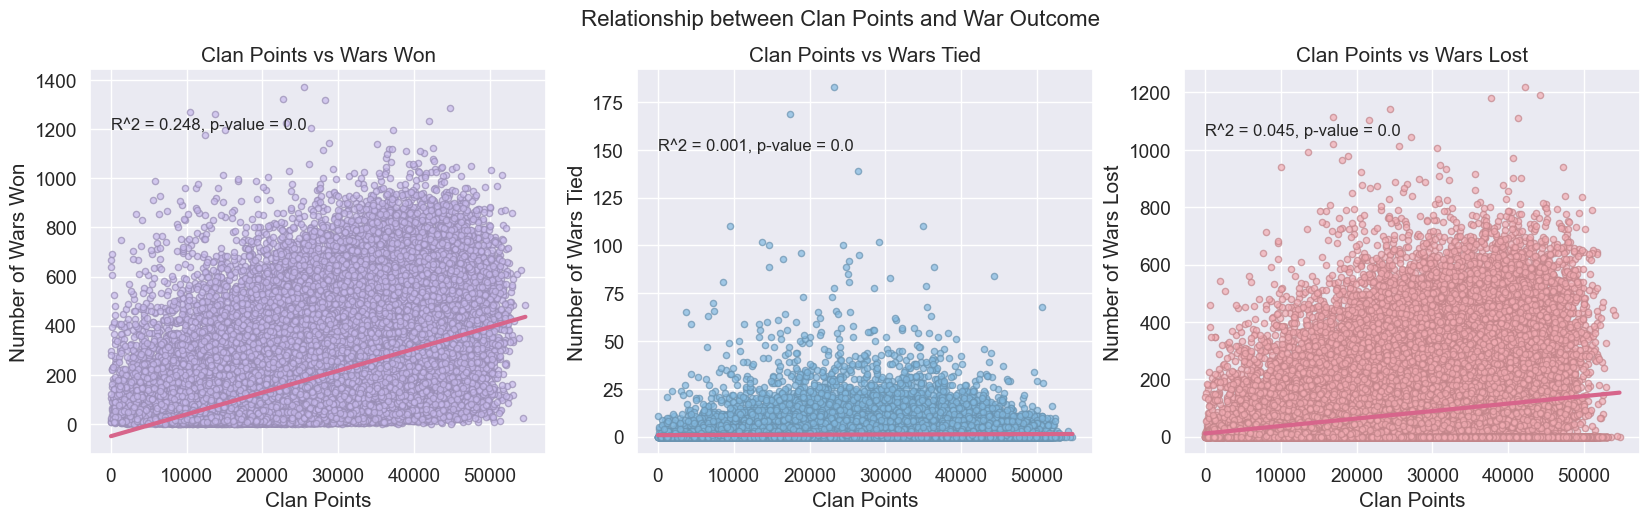

In [340]:
#CLAN POINTS:

#Defining the first regressor:
x_0 = war_df['clan_points'].values.reshape(-1, 1)

#Defining the model
model = LinearRegression()

#for war wins:
Y_won = war_df["war_wins"].values.reshape(-1, 1)
model.fit(x_0, Y_won)
r_squared_1 = model.score(x_0, Y_won)
xx_0 = sm.add_constant(x_0)
model_1 = sm.OLS(Y_won, xx_0).fit()
p_1 = model_1.pvalues[0] 

# for war ties:
Y_ties = war_df["war_ties"].values.reshape(-1, 1)
model.fit(x_0, Y_ties)
r_squared_2 = model.score(x_0, Y_ties)
model_2 = sm.OLS(Y_ties, xx_0).fit()
p_2 = model_2.pvalues[0] 

# for war losses:
Y_loss = war_df["war_losses"].values.reshape(-1, 1)
model.fit(x_0, Y_loss)
r_squared_3 = model.score(x_0, Y_loss)
model_3 = sm.OLS(Y_loss, xx_0).fit()
p_3 = model_3.pvalues[0]

#adding R2 and p-values to the stats_df:
stats_df.loc['Clan Points', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Clan Points', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Clan Points', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Clan Points', ('War Wins', 'p-value')] = p_1
stats_df.loc['Clan Points', ('War Ties', 'p-value')] = p_2
stats_df.loc['Clan Points', ('War Losses', 'p-value')] = p_3


#creating a subplot for war outcomes:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Clan Points and War Outcome', fontsize=16, y = 1)

#axes[0] will be for war wins:
sns.regplot(ax=axes[0], x=x_0, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Clan Points')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_title('Clan Points vs Wars Won')
# I am also implementing the R^2 and p-values into the graph (these were run after inital output to gauge the placement)
axes[0].text(2, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)

#axes[1] will be for war ties:
sns.regplot(ax=axes[1],x=x_0, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Clan Points')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Clan Points vs Wars Tied')
axes[1].text(2, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

#axes[2] will be for war losses:
sns.regplot(ax=axes[2], x=x_0, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Clan Points')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Clan Points vs Wars Lost')
axes[2].text(1.7, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

#Saving the plot output
plt.savefig('graphs/Clan_Points_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

### I will now do the same to the rest of the regressors:
----------------------------------------

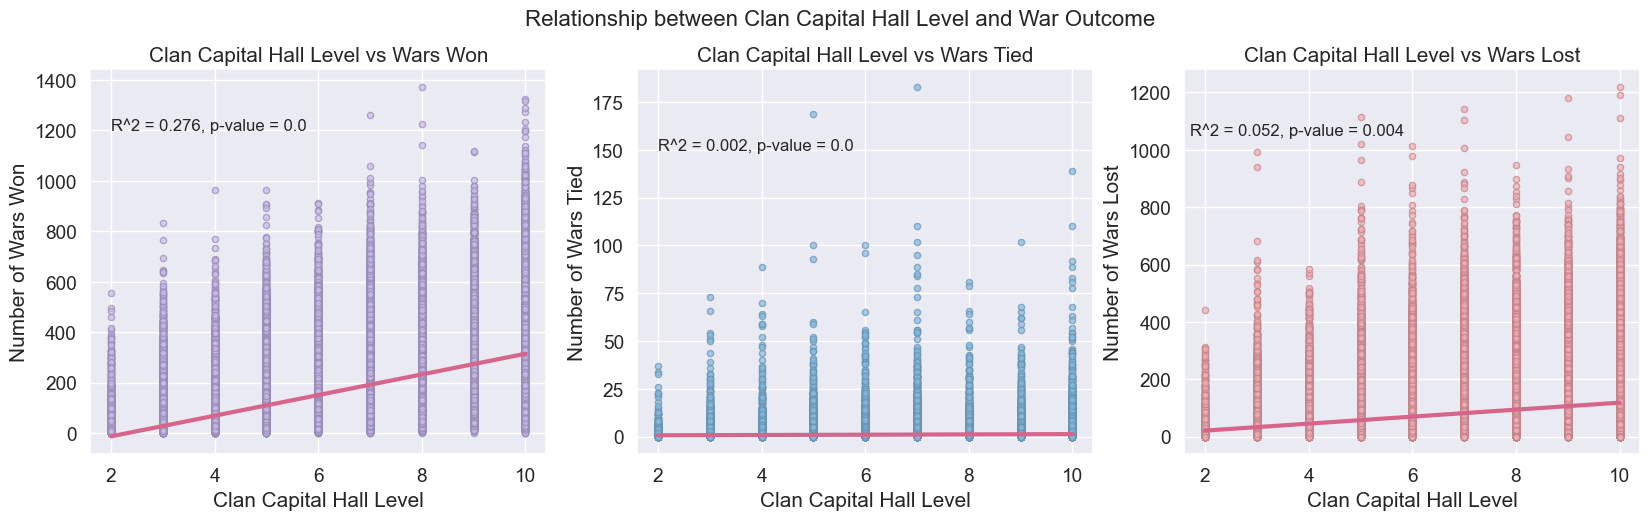

In [339]:
# CLAN CAPITAL HALL LEVEL:

x_1 = war_df['clan_capital_hall_level'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = war_df["war_wins"].values.reshape(-1, 1)
model.fit(x_1, Y_won)
r_squared_1 = model.score(x_1, Y_won)
xx_1 = sm.add_constant(x_1)
model_1 = sm.OLS(Y_won, xx_1).fit()
p_1 = model_1.pvalues[0] 

Y_ties = war_df["war_ties"].values.reshape(-1, 1)
model.fit(x_1, Y_ties)
r_squared_2 = model.score(x_1, Y_ties)
model_2 = sm.OLS(Y_ties, xx_1).fit()
p_2 = model_2.pvalues[0] 

Y_loss = war_df["war_losses"].values.reshape(-1, 1)
model.fit(x_1, Y_loss)
r_squared_3 = model.score(x_1, Y_loss)
model_3 = sm.OLS(Y_loss, xx_1).fit()
p_3 = model_3.pvalues[0]

stats_df.loc['Capital Hall Level', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Capital Hall Level', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Capital Hall Level', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Capital Hall Level', ('War Wins', 'p-value')] = p_1
stats_df.loc['Capital Hall Level', ('War Ties', 'p-value')] = p_2
stats_df.loc['Capital Hall Level', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Clan Capital Hall Level and War Outcome', fontsize=16, y = 1)

#axes[0] will be for war wins:
sns.regplot(ax=axes[0], x=x_1, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Clan Capital Hall Level')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_title('Clan Capital Hall Level vs Wars Won')
# I am also implementing the R^2 and p-values into the graph (these were run after inital output to gauge the placement)
axes[0].text(2, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)

#axes[1] will be for war ties:
sns.regplot(ax=axes[1],x=x_1, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Clan Capital Hall Level')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Clan Capital Hall Level vs Wars Tied')
axes[1].text(2, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

#axes[2] will be for war losses:
sns.regplot(ax=axes[2], x=x_1, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Clan Capital Hall Level')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Clan Capital Hall Level vs Wars Lost')
axes[2].text(1.7, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

#Saving the plot output
plt.savefig('graphs/Clan_Capital_Hall_Level_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

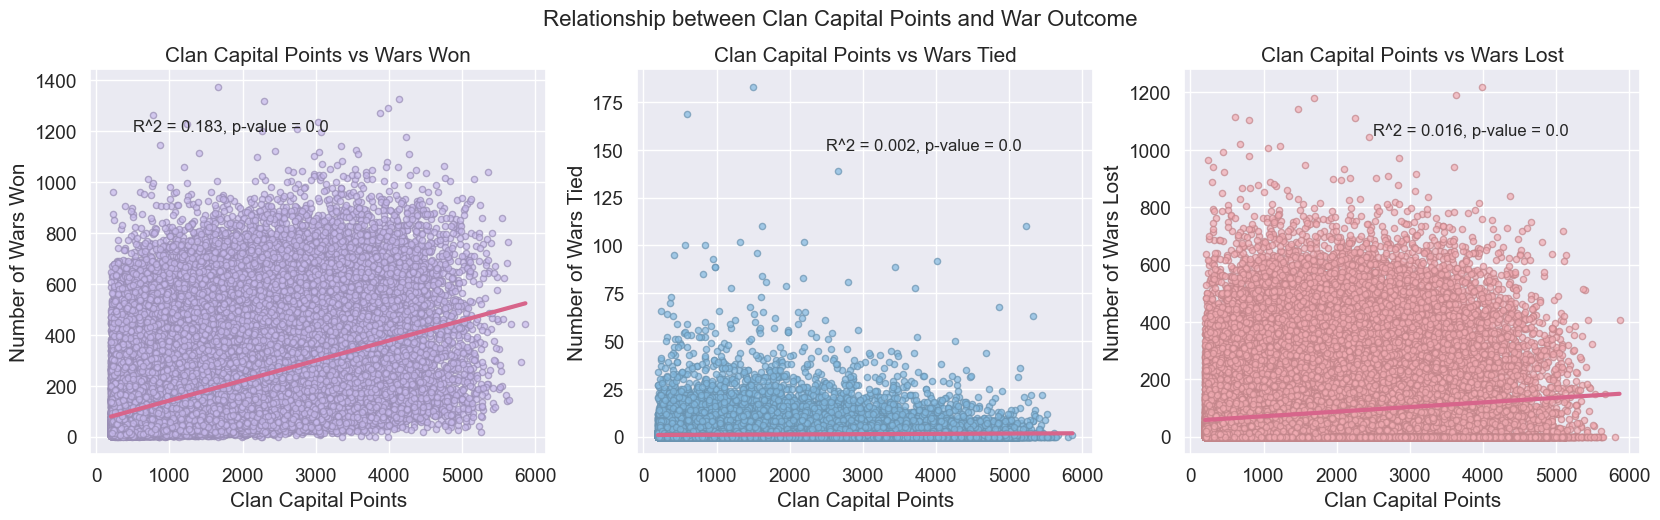

In [353]:
# CLAN CAPITAL HALL POINTS:

x_2 = war_df['clan_capital_points'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = war_df['war_wins'].values.reshape(-1, 1)
model.fit(x_2, Y_won)
r_squared_1 = model.score(x_2, Y_won)
xx_2 = sm.add_constant(x_2)
model_1 = sm.OLS(Y_won, xx_2).fit()
p_1 = model_1.pvalues[0] 

Y_ties = war_df['war_ties'].values.reshape(-1, 1)
model.fit(x_2, Y_ties)
r_squared_2 = model.score(x_2, Y_ties)
model_2 = sm.OLS(Y_ties, xx_2).fit()
p_2 = model_2.pvalues[0] 

Y_loss = war_df['war_losses'].values.reshape(-1, 1)
model.fit(x_2, Y_loss)
r_squared_3 = model.score(x_2, Y_loss)
model_3 = sm.OLS(Y_loss, xx_2).fit()
p_3 = model_3.pvalues[0]

stats_df.loc['Clan Capital Points', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Clan Capital Points', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Clan Capital Points', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Clan Capital Points', ('War Wins', 'p-value')] = p_1
stats_df.loc['Clan Capital Points', ('War Ties', 'p-value')] = p_2
stats_df.loc['Clan Capital Points', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Clan Capital Points and War Outcome', fontsize=16, y = 1)

#axes[0] will be for war wins:
sns.regplot(ax=axes[0], x=x_2, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Clan Capital Points')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_title('Clan Capital Points vs Wars Won')
# I am also implementing the R^2 and p-values into the graph (these were run after inital output to gauge the placement)
axes[0].text(500, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)

#axes[1] will be for war ties:
sns.regplot(ax=axes[1],x=x_2, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Clan Capital Points')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Clan Capital Points vs Wars Tied')
axes[1].text(2500, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

#axes[2] will be for war losses:
sns.regplot(ax=axes[2], x=x_2, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Clan Capital Points')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Clan Capital Points vs Wars Lost')
axes[2].text(2500, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

#Saving the plot output
plt.savefig('graphs/Clan_Capital_Points_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

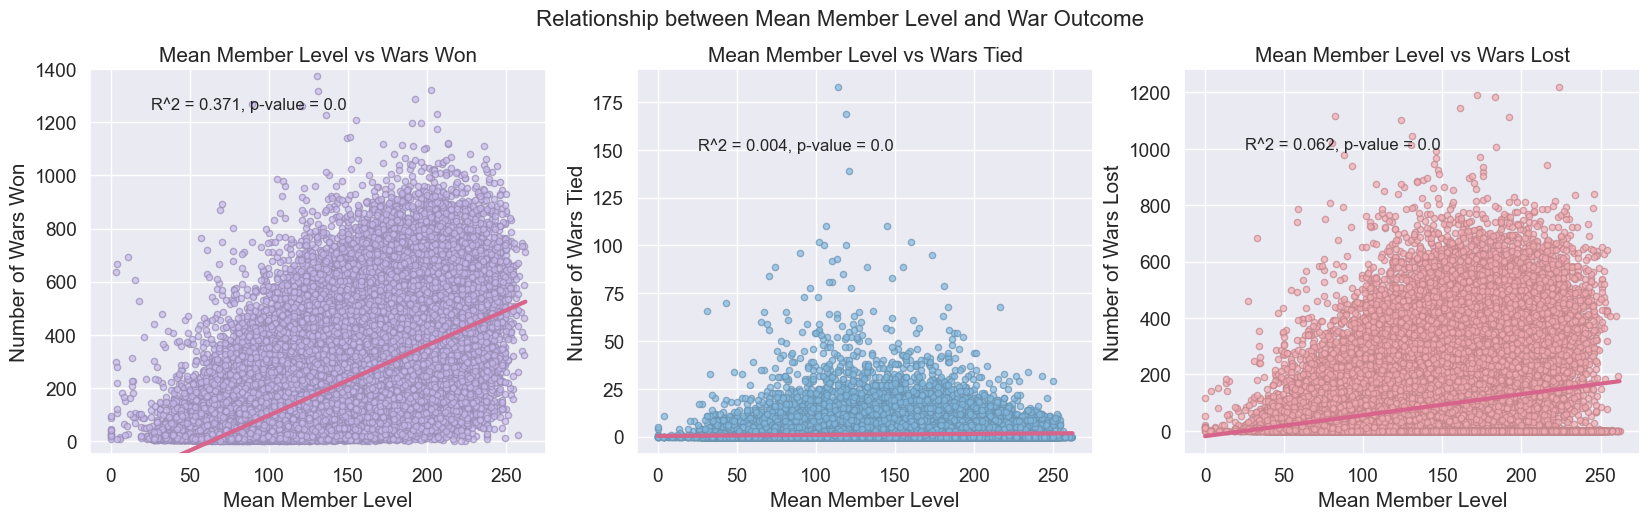

In [350]:
# MEAN MEMBER LEVEL:
x_3 = war_df['mean_member_level'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = war_df["war_wins"].values.reshape(-1, 1)
model.fit(x_3, Y_won)
r_squared_1 = model.score(x_3, Y_won)
xx_3 = sm.add_constant(x_3)
model_1 = sm.OLS(Y_won, xx_3).fit()
p_1 = model_1.pvalues[0] 

Y_ties = war_df["war_ties"].values.reshape(-1, 1)
model.fit(x_3, Y_ties)
r_squared_2 = model.score(x_3, Y_ties)
model_2 = sm.OLS(Y_ties, xx_3).fit()
p_2 = model_2.pvalues[0] 

Y_loss = war_df["war_losses"].values.reshape(-1, 1)
model.fit(X_3, Y_loss)
r_squared_3 = model.score(x_3, Y_loss)
model_3 = sm.OLS(Y_loss, xx_3).fit()
p_3 = model_3.pvalues[0]

stats_df.loc['Mean Member Level', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Mean Member Level', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Mean Member Level', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Mean Member Level', ('War Wins', 'p-value')] = p_1
stats_df.loc['Mean Member Level', ('War Ties', 'p-value')] = p_2
stats_df.loc['Mean Member Level', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Mean Member Level and War Outcome', fontsize=16, y = 1)

sns.regplot(ax=axes[0], x=x_3, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Mean Member Level')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_ylim(-50, 1400)
axes[0].set_title('Mean Member Level vs Wars Won')
axes[0].text(25, 1250, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)


sns.regplot(ax=axes[1],x=x_3, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Mean Member Level')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Mean Member Level vs Wars Tied')
axes[1].text(25, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

sns.regplot(ax=axes[2], x=x_3, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Mean Member Level')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Mean Member Level vs Wars Lost')
axes[2].text(25, 1000, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

plt.savefig('graphs/Mean_Member_Level_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

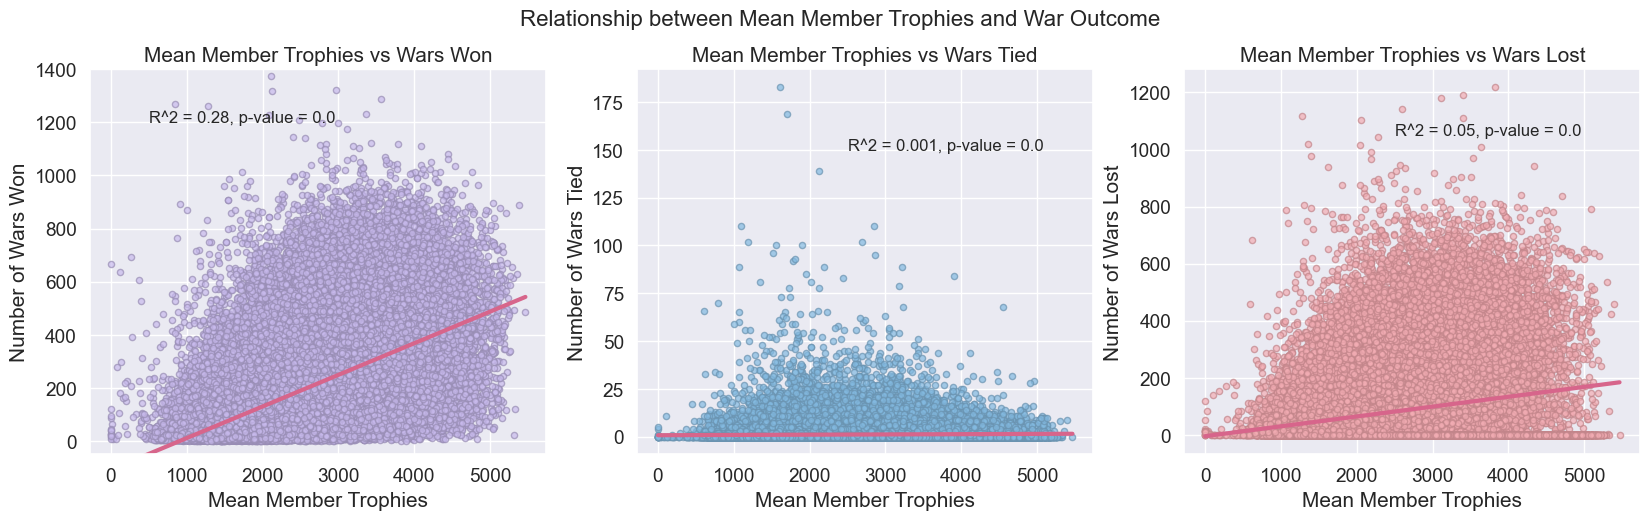

In [349]:
# MEAN MEMBER TROPHIES:
x_4 = war_df['mean_member_trophies'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = war_df["war_wins"].values.reshape(-1, 1)
model.fit(x_4, Y_won)
r_squared_1 = model.score(x_4, Y_won)
xx_4 = sm.add_constant(x_4)
model_1 = sm.OLS(Y_won, xx_4).fit()
p_1 = model_1.pvalues[0] 

Y_ties = jittered_war_df["war_ties_jitter"].values.reshape(-1, 1)
model.fit(x_4, Y_ties)
r_squared_2 = model.score(x_4, Y_ties)
model_2 = sm.OLS(Y_ties, xx_4).fit()
p_2 = model_2.pvalues[0] 

Y_loss = jittered_war_df["war_losses_jitter"].values.reshape(-1, 1)
model.fit(x_4, Y_loss)
r_squared_3 = model.score(x_4, Y_loss)
model_3 = sm.OLS(Y_loss, xx_4).fit()
p_3 = model_3.pvalues[0]

stats_df.loc['Mean Member Trophies', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Mean Member Trophies', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Mean Member Trophies', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Mean Member Trophies', ('War Wins', 'p-value')] = p_1
stats_df.loc['Mean Member Trophies', ('War Ties', 'p-value')] = p_2
stats_df.loc['Mean Member Trophies', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Mean Member Trophies and War Outcome', fontsize=16, y = 1)

sns.regplot(ax=axes[0], x=x_4, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Mean Member Trophies')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_ylim(-50, 1400)
axes[0].set_title('Mean Member Trophies vs Wars Won')
axes[0].text(500, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)


sns.regplot(ax=axes[1],x=x_4, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Mean Member Trophies')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Mean Member Trophies vs Wars Tied')
axes[1].text(2500, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

sns.regplot(ax=axes[2], x=x_4, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Mean Member Trophies')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Mean Member Trophies vs Wars Lost')
axes[2].text(2500, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

plt.savefig('graphs/Mean_Member_Trophies_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

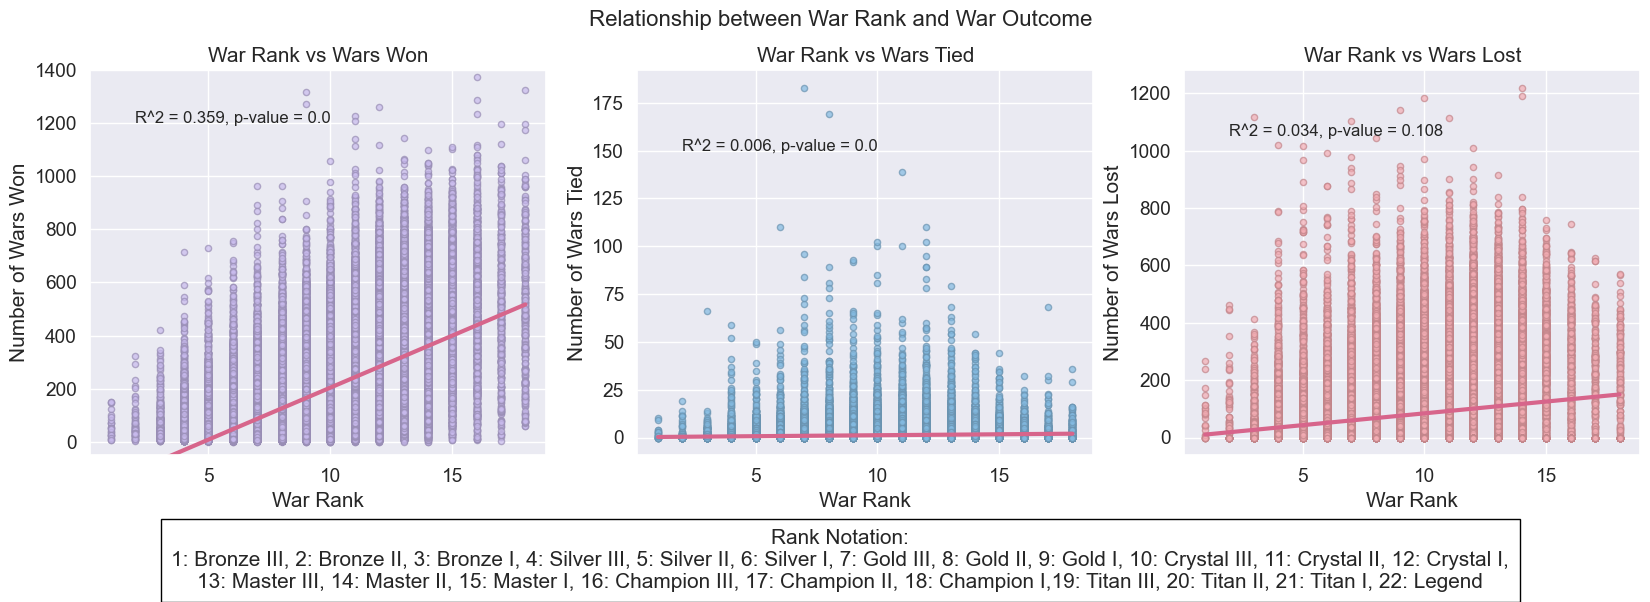

In [348]:
# WAR RANK:
x_5 = war_df['rank_number_war'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = war_df["war_wins"].values.reshape(-1, 1)
model.fit(x_5, Y_won)
r_squared_1 = model.score(x_5, Y_won)
xx_5 = sm.add_constant(x_5)
model_1 = sm.OLS(Y_won, xx_5).fit()
p_1 = model_1.pvalues[0] 

Y_ties = war_df["war_ties"].values.reshape(-1, 1)
model.fit(x_5, Y_ties)
r_squared_2 = model.score(x_5, Y_ties)
model_2 = sm.OLS(Y_ties, xx_5).fit()
p_2 = model_2.pvalues[0] 

Y_loss = war_df["war_losses"].values.reshape(-1, 1)
model.fit(X_5, Y_loss)
r_squared_3 = model.score(x_5, Y_loss)
model_3 = sm.OLS(Y_loss, xx_5).fit()
p_3 = model_3.pvalues[0]

stats_df.loc['War Rank', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['War Rank', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['War Rank', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['War Rank', ('War Wins', 'p-value')] = p_1
stats_df.loc['War Rank', ('War Ties', 'p-value')] = p_2
stats_df.loc['War Rank', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between War Rank and War Outcome', fontsize=16, y = 1)

#Here I am adding some information the ranks and the numbers I mapped against them so they are present in the graph
fig.text(0.50, -0.15, 'Rank Notation:' + '\n' + '1: Bronze III, 2: Bronze II, 3: Bronze I, 4: Silver III, 5: Silver II, ' + \
'6: Silver I, 7: Gold III, 8: Gold II, 9: Gold I, 10: Crystal III, 11: Crystal II, 12: Crystal I,' + '\n' + \
         '13: Master III, 14: Master II, 15: Master I, 16: Champion III, 17: Champion II, 18: Champion I,' + \
         '19: Titan III, 20: Titan II, 21: Titan I, 22: Legend', \
         horizontalalignment='center', wrap=True, bbox=dict(boxstyle='square, pad=0.5', facecolor='none', edgecolor='black'))

sns.regplot(ax=axes[0], x=x_5, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('War Rank')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_ylim(-50, 1400)
axes[0].set_title('War Rank vs Wars Won')
axes[0].text(2, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)


sns.regplot(ax=axes[1],x=x_5, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('War Rank')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('War Rank vs Wars Tied')
axes[1].text(2, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

sns.regplot(ax=axes[2], x=x_5, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('War Rank')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('War Rank vs Wars Lost')
axes[2].text(2, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

plt.savefig('graphs/War_Rank_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

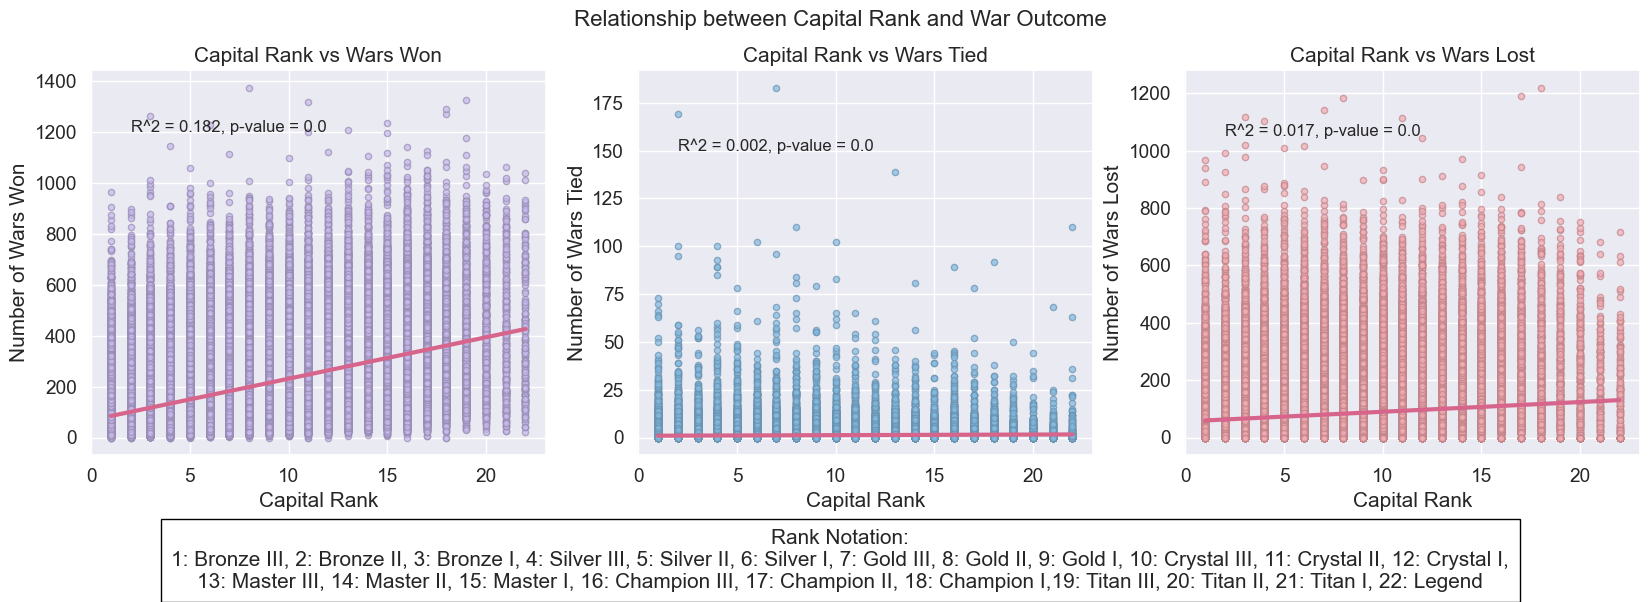

In [352]:
# CAPITAL RANK:
x_6 = war_df['rank_number_capital'].values.reshape(-1, 1)

model = LinearRegression()

Y_won = jittered_war_df["war_wins_jitter"].values.reshape(-1, 1)
model.fit(x_6, Y_won)
r_squared_1 = model.score(x_6, Y_won)
xx_6 = sm.add_constant(x_6)
model_2 = sm.OLS(Y_won, xx_6).fit()
p_1 = model_2.pvalues[0] 

Y_ties = jittered_war_df["war_ties_jitter"].values.reshape(-1, 1)
model.fit(X_6, Y_ties)
r_squared_2 = model.score(x_6, Y_ties)
model_2 = sm.OLS(Y_ties, xx_6).fit()
p_2 = model_2.pvalues[0] 

Y_loss = jittered_war_df["war_losses_jitter"].values.reshape(-1, 1)
model.fit(x_6, Y_loss)
r_squared_3 = model.score(x_6, Y_loss)
model_2 = sm.OLS(Y_loss, xx_6).fit()
p_3 = model_2.pvalues[0]

stats_df.loc['Capital Rank', ('War Wins', 'R^2')] = r_squared_1
stats_df.loc['Capital Rank', ('War Ties', 'R^2')] = r_squared_2
stats_df.loc['Capital Rank', ('War Losses', 'R^2')] = r_squared_3
stats_df.loc['Capital Rank', ('War Wins', 'p-value')] = p_1
stats_df.loc['Capital Rank', ('War Ties', 'p-value')] = p_2
stats_df.loc['Capital Rank', ('War Losses', 'p-value')] = p_3

fig, axes = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Relationship between Capital Rank and War Outcome', fontsize=16, y = 1)
fig.text(0.50, -0.15, 'Rank Notation:' + '\n' + '1: Bronze III, 2: Bronze II, 3: Bronze I, 4: Silver III, 5: Silver II, ' + \
'6: Silver I, 7: Gold III, 8: Gold II, 9: Gold I, 10: Crystal III, 11: Crystal II, 12: Crystal I,' + '\n' + \
         '13: Master III, 14: Master II, 15: Master I, 16: Champion III, 17: Champion II, 18: Champion I,' + \
         '19: Titan III, 20: Titan II, 21: Titan I, 22: Legend', \
         horizontalalignment='center', wrap=True, bbox=dict(boxstyle='square, pad=0.5', facecolor='none', edgecolor='black'))

sns.regplot(ax=axes[0], x=x_6, y=war_df['war_wins'].values.reshape(-1, 1), \
            scatter_kws={'color': '#c8baed', 's': 20, 'alpha': 0.7, 'edgecolor': '#988db4'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[0].set_xlabel('Capital Rank')
axes[0].set_ylabel('Number of Wars Won')
axes[0].set_title('Capital Rank vs Wars Won')
axes[0].text(2, 1200, 'R^2 = ' + str(round(r_squared_1, 3)) + ', p-value = ' + str(round(p_1, 3)), fontsize=12)


sns.regplot(ax=axes[1],x=x_6, y=war_df['war_ties'].values.reshape(-1, 1), \
            scatter_kws={'color': '#83BAE1', 's': 20, 'alpha': 0.7, 'edgecolor': '#6a93b0'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[1].set_xlabel('Capital Rank')
axes[1].set_ylabel('Number of Wars Tied')
axes[1].set_title('Capital Rank vs Wars Tied')
axes[1].text(2, 150, 'R^2 = ' + str(round(r_squared_2, 3)) + ', p-value = ' + str(round(p_2, 3)), fontsize=12)

sns.regplot(ax=axes[2], x=x_6, y=war_df['war_losses'].values.reshape(-1, 1), \
            scatter_kws={'color': '#f3adb4', 's': 20, 'alpha': 0.7, 'edgecolor': '#c2858a'}, \
            line_kws={'color': '#d7658b', 'linewidth': 3})
axes[2].set_xlabel('Capital Rank')
axes[2].set_ylabel('Number of Wars Lost')
axes[2].set_title('Capital Rank vs Wars Lost')
axes[2].text(2, 1050, 'R^2 = ' + str(round(r_squared_3, 3)) + ', p-value = ' + str(round(p_3, 3)), fontsize=12)

plt.savefig('graphs/War_Capital_vs_War_Outcome.png', bbox_inches='tight', pad_inches=0.5)

### Summary Statistics

In [354]:
stats_df

War Wins          War Ties         War Losses          
                           R^2 p-value       R^2 p-value        R^2   p-value
Clan Points           0.247826     0.0  0.000926     0.0   0.044885       0.0
Capital Hall Level    0.275849     0.0  0.002489     0.0   0.051697  0.003924
Clan Capital Points   0.183071     0.0  0.001772     0.0   0.016303       0.0
Mean Member Level     0.371403     0.0  0.003924     0.0   0.062349       0.0
Mean Member Trophies  0.279882     0.0  0.000927     0.0   0.049892  0.000008
War Rank              0.359117     0.0  0.005795     0.0   0.033525  0.107799
Capital Rank          0.182403     0.0   0.00164     0.0   0.016703       0.0

----------------------------
### Conclusions:
 
The final size of the data provided 131,141 data entries after the removal of missing and redundant data. 

Initial exploratory analysis via a correlational matrix and Variance Inflation Factor (VIF) analysis determined multicollinarity between all factors above. These factors however were highly correlated with war outcomes and hence the project took incentive direction to gain further insights into these relationships. 

All factors analysed provided at least 15% of explained variance regarding winning clan wars, whilst they provided little explaination regarding war ties and war losses. What was most interesting was the contribution of the Clan Capital determining war wins, over clan points. Capital Hall Level explained 3% more variance amongst wars won, encouraging active clans who enjoy levelling their Capital Hall to participate in clan wars. Other regressors such as Mean Member Level and Trophies contribute largely to predicting wars won. All these factors seem to play little role in wars ending in ties or losses. 

Overall, this investigation has provided some interesting insights regarding strategy and gameplay tactics. In other words, war success can be determined by all the factors mentioned above, even those seemingly unrelated e.g. Capital Hall activity.